In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

import sklearn
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer
from sklearn import model_selection, svm
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# DFRAW

In [ ]:
!wget -O trainRaw.csv https://raw.githubusercontent.com/godhi06/TA/master/data/traintesbaru/dfTrain_Raw.csv
!wget -O testRaw.csv https://raw.githubusercontent.com/godhi06/TA/master/data/traintesbaru/dfTest_Raw.csv

traindataRaw = pd.read_csv('trainRaw.csv', index_col=0) 
testdataRaw = pd.read_csv('testRaw.csv', index_col=0) 

--2020-08-03 06:33:11--  https://raw.githubusercontent.com/godhi06/TA/master/data/traintesbaru/dfTrain_Raw.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 156521 (153K) [text/plain]
Saving to: ‘trainRaw.csv’

trainRaw.csv        100%[===================>] 152.85K  --.-KB/s    in 0.04s   

2020-08-03 06:33:11 (3.59 MB/s) - ‘trainRaw.csv’ saved [156521/156521]

--2020-08-03 06:33:13--  https://raw.githubusercontent.com/godhi06/TA/master/data/traintesbaru/dfTest_Raw.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 66061 (65K) [text/plai

In [ ]:
# defining predictor and target features
X_trainRaw = traindataRaw['text']
y_trainRaw = traindataRaw['label']

X_testRaw = testdataRaw['text']
y_testRaw = testdataRaw['label']

TFIDF

In [ ]:
#encoding the corpus using Term Frequency - Inverse Document Frequency Encoding
Tfidf_vect = TfidfVectorizer()

In [ ]:

#fitting encoder on training data
Tfidf_vect.fit(X_trainRaw)


TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [ ]:

#Transforming the corpus for the training and testing data
Train_XRaw_Tfidf = Tfidf_vect.transform(X_trainRaw)
Test_XRaw_Tfidf = Tfidf_vect.transform(X_testRaw)

In [ ]:
#preview vocabulary vector
print(Tfidf_vect.vocabulary_)

{'ve': 3459, 'had': 1505, 'major': 2006, 'depressive': 922, 'disorder': 984, 'for': 1339, 'many': 2023, 'years': 3653, 'now': 2234, 'and': 227, 'it': 1797, 'got': 1460, 'to': 3290, 'the': 3233, 'point': 2454, 'sometime': 2976, 'last': 1892, 'year': 3652, 'where': 3571, 'didn': 951, 'have': 1554, 'energy': 1131, 'or': 2290, 'ability': 103, 'practice': 2482, 'personal': 2394, 'hygiene': 1675, 'such': 3112, 'as': 297, 'showering': 2884, 'daily': 856, 'brushing': 528, 'my': 2168, 'teeth': 3196, 'braces': 497, 'on': 2271, 'few': 1271, 'months': 2135, 'ago': 184, 'am': 213, 'hopeless': 1634, 'at': 317, 'caring': 590, 'them': 3236, 'never': 2197, 'used': 3443, 'brush': 525, 'before': 399, 'due': 1059, 'depression': 920, 'just': 1832, 'dawned': 873, 'upon': 3432, 'me': 2047, 'that': 3230, 'haven': 1555, 'brushed': 526, 'in': 1714, 'very': 3468, 'long': 1970, 'time': 3284, 'like': 1948, 'least': 1912, 'week': 3543, 'probably': 2510, 'two': 3369, 'already': 204, 'aware': 349, 'will': 3589, 'be':

In [ ]:
#preview transformed training data
print(Train_XRaw_Tfidf)

  (0, 3653)	0.05965714130241093
  (0, 3652)	0.05899521908325165
  (0, 3589)	0.05999671221766038
  (0, 3577)	0.10395281421453906
  (0, 3571)	0.06843404488540111
  (0, 3569)	0.05387259998233923
  (0, 3543)	0.07608860215248608
  (0, 3468)	0.06791335174844434
  (0, 3459)	0.04646312755022591
  (0, 3443)	0.07858452770072975
  (0, 3432)	0.12540303841275752
  (0, 3369)	0.07858452770072975
  (0, 3290)	0.10622681305969912
  (0, 3284)	0.05626639015129045
  (0, 3259)	0.08606238841812058
  (0, 3242)	0.06034229354868306
  (0, 3236)	0.12511003497010323
  (0, 3233)	0.0827136258581961
  (0, 3230)	0.03900863587869504
  (0, 3196)	0.5047152377549324
  (0, 3112)	0.09211811236816424
  (0, 3016)	0.11748639888197354
  (0, 2976)	0.12540303841275752
  (0, 2884)	0.12540303841275752
  (0, 2510)	0.1777128176959843
  :	:
  (451, 1462)	0.11916036249836555
  (451, 1444)	0.08357975117288977
  (451, 1424)	0.07034352519135274
  (451, 1410)	0.2689385334997519
  (451, 1339)	0.046159519729688764
  (451, 1182)	0.16221643205

In [ ]:
# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
SVM = svm.SVC(kernel = 'linear')
SVM.fit(Train_XRaw_Tfidf, y_trainRaw)

# Use accuracy_score function to get the accuracy
print("SVM Training Accuracy Score -> ", SVM.score(Train_XRaw_Tfidf, y_trainRaw)*100)
print("SVM Testing Accuracy Score -> ", SVM.score(Test_XRaw_Tfidf, y_testRaw)*100)

SVM Training Accuracy Score ->  99.77876106194691
SVM Testing Accuracy Score ->  96.90721649484536


In [ ]:
def plot_coefficients(classifier, feature_names, top_features=20):
    
    
    #converting coefficient matrix from sparse to dense and then unravelling it
    coef = np.ravel(classifier.coef_.reshape(-1, 1).todense())
    #getting the top n positive coefficients
    tpc = np.argsort(coef)[-top_features:]
    #getting the top n negative coefficients
    tnc = np.argsort(coef)[:top_features]
    #stacking them to form one array of top positive and negative coefficients
    top_coefficients = np.hstack([tnc, tpc])
    # creating plot
    plt.figure(figsize=(15, 5))
    #assigning color labels
    colors = ['red' if c < 0 else 'blue' for c in coef[top_coefficients]]
    #plotting data
    plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
    feature_names = np.array(feature_names)
    plt.xticks(np.arange(1, 1 + 2 * top_features), feature_names[top_coefficients], rotation=60, ha = 'right')
    plt.xlabel("Feature Names")
    plt.ylabel("Linear SVM Coefficient")
    plt.show()

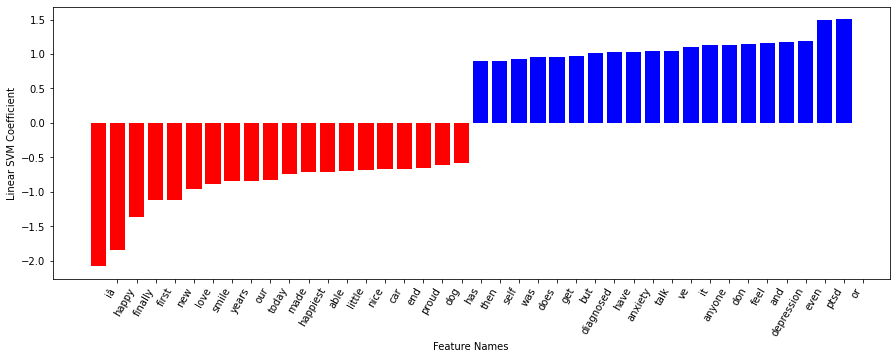

In [ ]:
#plotting top n features and their coefficients
plot_coefficients(SVM, Tfidf_vect.get_feature_names())

optimisasi model

In [ ]:
#initializing tfidf vectorizer and an SVM classifier instance
tfidf = TfidfVectorizer()
clf = svm.SVC()


In [ ]:
#constructing the pipeline
pipe = Pipeline([
    ('tfidf', tfidf),
    ('clf', clf)
])

In [ ]:
linear_grid = {'tfidf__max_features': [500, 1000, 5000, None],
    'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)],
    'clf__C': np.logspace(-1, 3, 5),
    'clf__kernel' : ['linear']}
    
poly_grid = {'tfidf__max_features': [500, 1000, 5000, None],
    'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)],
    'clf__C': np.logspace(-1, 3, 5),
    'clf__kernel' : ['poly'],
    'clf__degree' : [2, 3],
    'clf__gamma': np.logspace(-2, 2, 5)}

rbf_grid = {'tfidf__max_features': [500, 1000, 5000, None],
    'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)],
    'clf__C': np.logspace(-1, 3, 5),
    'clf__kernel' : ['rbf'],
    'clf__gamma': np.logspace(-2, 2, 5)}

In [ ]:

scv_linear = RandomizedSearchCV(pipe, param_distributions = linear_grid, n_iter = 10, cv = 5, verbose = 2, n_jobs = -1, return_train_score = True, random_state = 42)
scv_linear.fit(X_trainRaw, y_trainRaw);

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    7.8s finished


In [ ]:
#using a randomized grid search to find the optimal value of the hyperparameters over a 5-fold cross-validation
scv_poly = RandomizedSearchCV(pipe, param_distributions = poly_grid, n_iter = 10, cv = 5, verbose = 2, n_jobs = -1, return_train_score = True, random_state = 42)
scv_poly.fit(X_trainRaw, y_trainRaw);

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   11.6s finished


In [ ]:
#using a randomized grid search to find the optimal value of the hyperparameters over a 5-fold cross-validation
scv_rbf = RandomizedSearchCV(pipe, param_distributions = rbf_grid, n_iter = 10, cv = 5, verbose = 2, n_jobs = -1, return_train_score = True, random_state = 42)
scv_rbf.fit(X_trainRaw, y_trainRaw);

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   12.7s finished


In [ ]:
#preview randomized gridsearch results
pd.DataFrame(scv_linear.cv_results_)[['params', 'mean_train_score', 'mean_test_score']]

,params,mean_train_score,mean_test_score
0,"{'tfidf__ngram_range': (1, 1), 'tfidf__max_fea...",0.939713,0.887131
1,"{'tfidf__ngram_range': (1, 3), 'tfidf__max_fea...",0.953541,0.893724
2,"{'tfidf__ngram_range': (1, 1), 'tfidf__max_fea...",1.000000,0.887204
3,"{'tfidf__ngram_range': (1, 1), 'tfidf__max_fea...",1.000000,0.918168
4,"{'tfidf__ngram_range': (1, 2), 'tfidf__max_fea...",0.988386,0.907057
5,"{'tfidf__ngram_range': (1, 1), 'tfidf__max_fea...",1.000000,0.918168
6,"{'tfidf__ngram_range': (1, 1), 'tfidf__max_fea...",1.000000,0.918168
7,"{'tfidf__ngram_range': (1, 1), 'tfidf__max_fea...",1.000000,0.887204
8,"{'tfidf__ngram_range': (1, 1), 'tfidf__max_fea...",0.990043,0.907033
9,"{'tfidf__ngram_range': (1, 1), 'tfidf__max_fea...",1.000000,0.918168


In [ ]:
pd.DataFrame(scv_poly.cv_results_)[['params', 'mean_train_score', 'mean_test_score']]

,params,mean_train_score,mean_test_score
0,"{'tfidf__ngram_range': (1, 3), 'tfidf__max_fea...",1.000000,0.882711
1,"{'tfidf__ngram_range': (1, 3), 'tfidf__max_fea...",1.000000,0.836239
2,"{'tfidf__ngram_range': (1, 2), 'tfidf__max_fea...",1.000000,0.887179
3,"{'tfidf__ngram_range': (1, 3), 'tfidf__max_fea...",0.800554,0.702247
4,"{'tfidf__ngram_range': (1, 2), 'tfidf__max_fea...",0.800554,0.662247
5,"{'tfidf__ngram_range': (1, 3), 'tfidf__max_fea...",1.000000,0.909255
6,"{'tfidf__ngram_range': (1, 2), 'tfidf__max_fea...",0.800554,0.704469
7,"{'tfidf__ngram_range': (1, 2), 'tfidf__max_fea...",1.000000,0.887179
8,"{'tfidf__ngram_range': (1, 1), 'tfidf__max_fea...",0.800554,0.680024
9,"{'tfidf__ngram_range': (1, 2), 'tfidf__max_fea...",1.000000,0.887179


In [ ]:
pd.DataFrame(scv_rbf.cv_results_)[['params', 'mean_train_score', 'mean_test_score']]

,params,mean_train_score,mean_test_score
0,"{'tfidf__ngram_range': (1, 3), 'tfidf__max_fea...",1.000000,0.851722
1,"{'tfidf__ngram_range': (1, 3), 'tfidf__max_fea...",1.000000,0.909304
2,"{'tfidf__ngram_range': (1, 3), 'tfidf__max_fea...",1.000000,0.909231
3,"{'tfidf__ngram_range': (1, 1), 'tfidf__max_fea...",0.757460,0.720024
4,"{'tfidf__ngram_range': (1, 3), 'tfidf__max_fea...",1.000000,0.500024
5,"{'tfidf__ngram_range': (1, 2), 'tfidf__max_fea...",1.000000,0.500024
6,"{'tfidf__ngram_range': (1, 2), 'tfidf__max_fea...",1.000000,0.911453
7,"{'tfidf__ngram_range': (1, 2), 'tfidf__max_fea...",1.000000,0.497802
8,"{'tfidf__ngram_range': (1, 3), 'tfidf__max_fea...",0.771272,0.728913
9,"{'tfidf__ngram_range': (1, 2), 'tfidf__max_fea...",1.000000,0.497802


In [ ]:
#preview the best parameters as found by the gridsearch
scv_linear.best_params_

{'clf__C': 100.0,
 'clf__kernel': 'linear',
 'tfidf__max_features': None,
 'tfidf__ngram_range': (1, 1)}

In [ ]:
#selecting the classifier with the hyperparameters yielding the highest average cross-validation score
best_clf = scv_linear.best_estimator_

evaluasi model

In [ ]:
# Use accuracy_score function to get the accuracy
print("SVM Training Accuracy Score -> ", best_clf.score(X_trainRaw, y_trainRaw)*100)
print("SVM Testing Accuracy Score  -> ", best_clf.score(X_testRaw, y_testRaw)*100)

SVM Training Accuracy Score ->  100.0
SVM Testing Accuracy Score  ->  97.9381443298969


In [ ]:
#obtaining predictions and decision function scores
Pred_YRaw = best_clf.predict(X_testRaw)
Score_YRaw = best_clf.decision_function(X_testRaw)

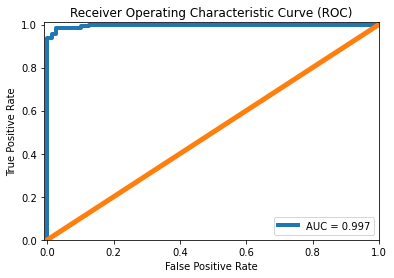

In [ ]:
#plotting the Receiver Operating Characteristic (ROC) Curve
false_pos_rate, true_pos_rate, thresholds = roc_curve(y_testRaw, Score_YRaw)
roc_auc = auc(false_pos_rate, true_pos_rate,)

plt.plot(false_pos_rate, true_pos_rate, linewidth=4, label='AUC = %0.3f'% roc_auc)
plt.plot([0,1],[0,1], linewidth=5)

plt.xlim([-0.01, 1])
plt.ylim([0, 1.01])
plt.legend(loc='lower right')
plt.title('Receiver Operating Characteristic Curve (ROC)')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

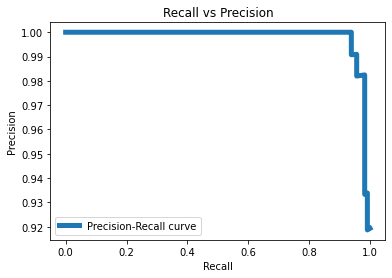

In [ ]:

#Plotting Precision versus Recall
precision_rate, recall_rate, threshold_rate = precision_recall_curve(y_testRaw, Score_YRaw)
plt.plot(recall_rate, precision_rate, linewidth=5, label='Precision-Recall curve')
plt.title('Recall vs Precision')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

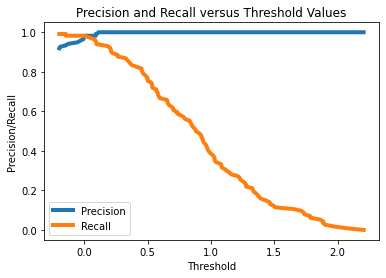

In [ ]:
#Plotting Precision and Recall for different Threshold values
plt.plot(threshold_rate, precision_rate[1:], label="Precision",linewidth=4)
plt.plot(threshold_rate, recall_rate[1:], label="Recall",linewidth=4)
plt.title('Precision and Recall versus Threshold Values')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')
plt.legend()
plt.show()

confusion matrix

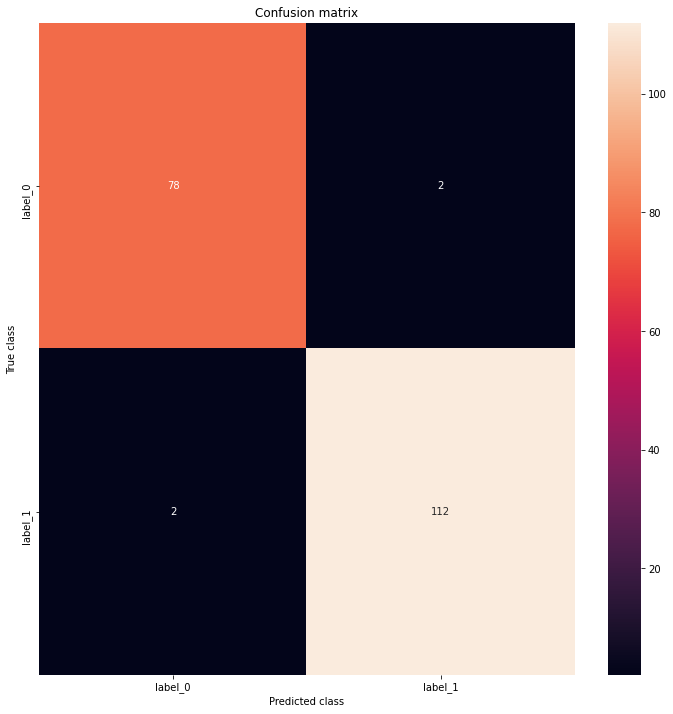

In [ ]:
#creating and displaying confusion matrix
LABELS = ['label_0', 'label_1']
conf_matrix = confusion_matrix(y_testRaw, Pred_YRaw)
plt.figure(figsize=(12, 12))
sb.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [ ]:
wrong_classified = Pred_YRaw != y_testRaw

In [ ]:
wrong_classified

2      False
6      False
7      False
10     False
11     False
       ...  
627    False
633    False
641    False
642    False
644    False
Name: label, Length: 194, dtype: bool

In [ ]:
wrong_data = testdataRaw[wrong_classified == True]
wrong_labels = Pred_YRaw[wrong_classified == True]

In [ ]:
false_positiveraw = wrong_data[wrong_labels == 1] 

In [ ]:

len(false_positiveraw)

2

In [ ]:
false_positiveraw

,text,label
311,My daily routine lately that has worked wonder...,0
617,Iâve got my birthday party tonight with most...,0


In [ ]:
false_negativeraw = wrong_data[wrong_labels == 0]  

In [ ]:

len(false_negativeraw)

2

In [ ]:
false_negativeraw

,text,label
29,Cat was laying on my computer chair in my roo...,1
43,What can i do to make up for a friend after a...,1


classification report

In [ ]:
#generating and printing a classification report

print(classification_report(y_testRaw, Pred_YRaw))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        80
           1       0.98      0.98      0.98       114

    accuracy                           0.98       194
   macro avg       0.98      0.98      0.98       194
weighted avg       0.98      0.98      0.98       194



In [ ]:

print("Accuracy score: ", accuracy_score(y_testRaw,Pred_YRaw))

Accuracy score:  0.979381443298969


# DFRAW + fitur seleksi

In [ ]:

from sklearn.feature_selection import SelectKBest, chi2



In [ ]:

chraw = SelectKBest(chi2)
clfraw = svm.SVC()
tfidf = TfidfVectorizer()

#constructing the pipeline
piperaw = Pipeline([
    # ('tfidf', tfidf),
    ('chi2', chraw),
    ('clf', clfraw)
])

para = {"chi2__k" : np.arange(130, 3400, 200)}

estimatoraw = GridSearchCV(piperaw,para)
estimatoraw.fit(Train_XRaw_Tfidf.toarray(), y_trainRaw)



GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('chi2',
                                        SelectKBest(k=10,
                                                    score_func=<function chi2 at 0x7f0bf093b730>)),
                                       ('clf',
                                        SVC(C=1.0, break_ties=False,
                                            cache_size=200, class_weight=None,
                                            coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='scale',
                                            kernel='rbf', max_iter=-1,
                                            probability=False,
                                            random_state=None, shrinking=True,
                                            tol=0.001, verbose=False))],
                              

In [ ]:

scoreraw = estimatoraw.best_score_
bestraw = estimatoraw.best_params_

bestraw

{'chi2__k': 3130}

In [ ]:
scoreraw

0.9225152625152624

In [ ]:
print ("Select feature for training set via Chi2 ...")

chraw = SelectKBest(chi2, k=3130)


x_trainraw_feature_selected=chraw.fit_transform(Train_XRaw_Tfidf, y_trainRaw)
print ("Select feature for testset via Chi2 ...")
x_testraw_chi_selected = chraw.transform(Test_XRaw_Tfidf)
print ("Finished")

Select feature for training set via Chi2 ...
Select feature for testset via Chi2 ...
Finished


In [ ]:
# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
SVMraw = svm.SVC(kernel = 'linear')
SVMraw.fit(x_trainraw_feature_selected, y_trainRaw)


# Use accuracy_score function to get the accuracy
print("SVM Training Accuracy Score -> ", SVMraw.score(x_trainraw_feature_selected, y_trainRaw)*100)
print("SVM Testing Accuracy Score -> ", SVMraw.score(x_testraw_chi_selected, y_testRaw)*100)

SVM Training Accuracy Score ->  99.77876106194691
SVM Testing Accuracy Score ->  96.3917525773196


In [ ]:

chraw = SelectKBest(chi2, k=3130)
clfraw = svm.SVC()
tfidfraw = TfidfVectorizer()

piperaw = Pipeline([
    ('tfidf', tfidfraw),
    ('chi2', chraw),
    ('clf', clfraw)
])

In [ ]:

linear_grid = {'tfidf__max_features': [500, 1000, 5000, None],
    'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)],
    'clf__C': np.logspace(-1, 3, 5),
    'clf__kernel' : ['linear']}
    
poly_grid = {'tfidf__max_features': [500, 1000, 5000, None],
    'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)],
    'clf__C': np.logspace(-1, 3, 5),
    'clf__kernel' : ['poly'],
    'clf__degree' : [2, 3],
    'clf__gamma': np.logspace(-2, 2, 5)}

rbf_grid = {'tfidf__max_features': [500, 1000, 5000, None],
    'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)],
    'clf__C': np.logspace(-1, 3, 5),
    'clf__kernel' : ['rbf'],
    'clf__gamma': np.logspace(-2, 2, 5)}

In [ ]:
scv_linear = RandomizedSearchCV(piperaw, param_distributions = linear_grid, n_iter = 10, cv = 5, verbose = 2, n_jobs = -1, return_train_score = True, random_state = 42)
scv_linear.fit(X_trainRaw, y_trainRaw);

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    4.0s finished


In [ ]:
#using a randomized grid search to find the optimal value of the hyperparameters over a 5-fold cross-validation
scv_poly = RandomizedSearchCV(piperaw, param_distributions = poly_grid, n_iter = 10, cv = 5, verbose = 2, n_jobs = -1, return_train_score = True, random_state = 42)
scv_poly.fit(X_trainRaw, y_trainRaw);

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    7.4s finished


In [ ]:
#using a randomized grid search to find the optimal value of the hyperparameters over a 5-fold cross-validation
scv_rbf = RandomizedSearchCV(piperaw, param_distributions = rbf_grid, n_iter = 10, cv = 5, verbose = 2, n_jobs = -1, return_train_score = True, random_state = 42)
scv_rbf.fit(X_trainRaw, y_trainRaw);

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    8.7s finished


In [ ]:
#preview the best parameters as found by the gridsearch
scv_linear.best_params_

{'clf__C': 100.0,
 'clf__kernel': 'linear',
 'tfidf__max_features': None,
 'tfidf__ngram_range': (1, 1)}

In [ ]:
#selecting the classifier with the hyperparameters yielding the highest average cross-validation score
best_clfchiraw = scv_linear.best_estimator_
best_clfchiraw


Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='...
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('chi2',
                 SelectKBest(k=3130,
                             score_func=<function chi2 at 0x7f0bf093b730>)),
                ('clf',
                 SVC(C=1

evaluasi model

In [ ]:

# Use accuracy_score function to get the accuracy
print("SVM Training Accuracy Score with chi square for data raw-> ", best_clfchiraw.score(X_trainRaw, y_trainRaw)*100)
print("SVM Testing Accuracy Score with chi square for data raw -> ", best_clfchiraw.score(X_testRaw, y_testRaw)*100)



SVM Training Accuracy Score with chi square for data raw->  100.0
SVM Testing Accuracy Score with chi square for data raw ->  98.4536082474227


In [ ]:
#obtaining predictions and decision function scores
Predraw_Ychi = best_clfchiraw.predict(X_testRaw)
Scoreraw_Ychi = best_clfchiraw.decision_function(X_testRaw)

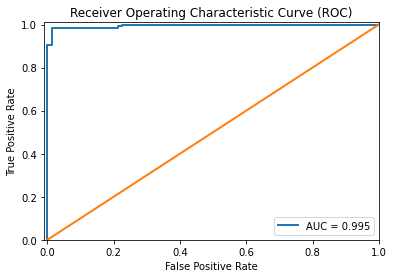

In [ ]:
#plotting the Receiver Operating Characteristic (ROC) Curve
false_pos_rate, true_pos_rate, thresholds = roc_curve(y_testRaw, Scoreraw_Ychi)
roc_auc = auc(false_pos_rate, true_pos_rate,)

plt.plot(false_pos_rate, true_pos_rate, linewidth=2, label='AUC = %0.3f'% roc_auc)
plt.plot([0,1],[0,1], linewidth=2)

plt.xlim([-0.01, 1])
plt.ylim([0, 1.01])
plt.legend(loc='lower right')
plt.title('Receiver Operating Characteristic Curve (ROC)')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

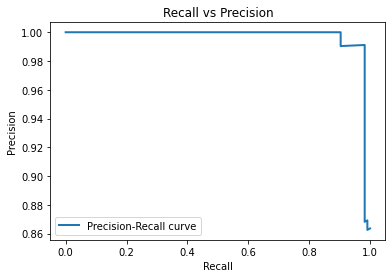

In [ ]:

#Plotting Precision versus Recall
precision_rate, recall_rate, threshold_rate = precision_recall_curve(y_testRaw, Scoreraw_Ychi)
plt.plot(recall_rate, precision_rate, linewidth=2, label='Precision-Recall curve')
plt.title('Recall vs Precision')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

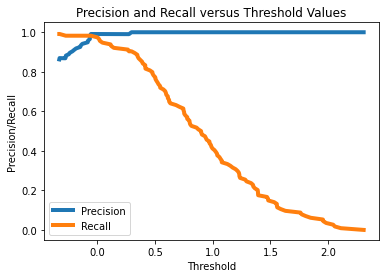

In [ ]:
#Plotting Precision and Recall for different Threshold values
plt.plot(threshold_rate, precision_rate[1:], label="Precision",linewidth=4)
plt.plot(threshold_rate, recall_rate[1:], label="Recall",linewidth=4)
plt.title('Precision and Recall versus Threshold Values')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')
plt.legend()
plt.show()

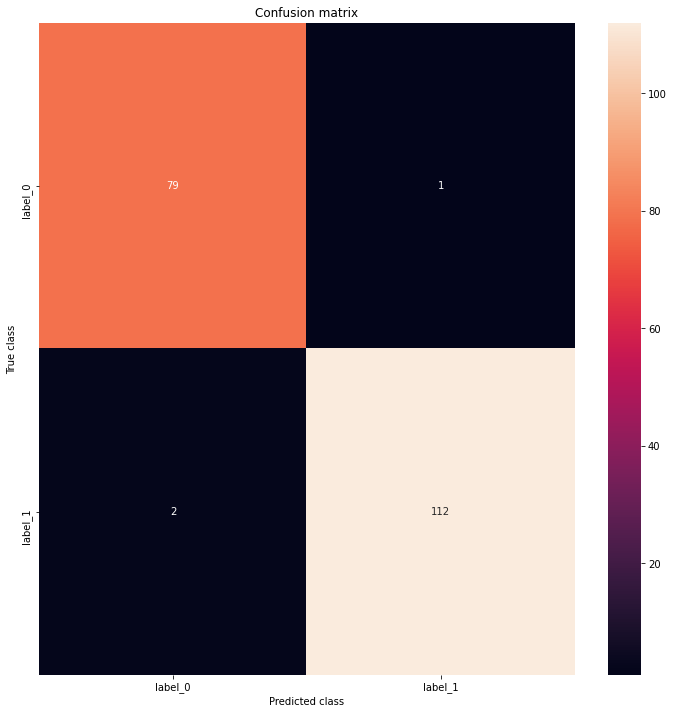

In [ ]:
#creating and displaying confusion matrix
LABELS = ['label_0', 'label_1']
conf_matrix = confusion_matrix(y_testRaw, Predraw_Ychi)
plt.figure(figsize=(12, 12))
sb.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [ ]:
wrong_classifiedrawchi = Predraw_Ychi != y_testRaw

In [ ]:
wrong_classifiedrawchi

2      False
6      False
7      False
10     False
11     False
       ...  
627    False
633    False
641    False
642    False
644    False
Name: label, Length: 194, dtype: bool

In [ ]:
wrong_data = testdataRaw[wrong_classifiedrawchi == True]
wrong_labels = Predraw_Ychi[wrong_classifiedrawchi == True]

In [ ]:
false_positiverawchi = wrong_data[wrong_labels == 1] 

In [ ]:
len(false_positiverawchi)

1

In [ ]:
false_positiverawchi

,text,label
311,My daily routine lately that has worked wonder...,0


In [ ]:

false_negativerawchi = wrong_data[wrong_labels == 0] 

In [ ]:

len(false_negativerawchi)

2

In [ ]:
false_negativerawchi

,text,label
29,Cat was laying on my computer chair in my roo...,1
43,What can i do to make up for a friend after a...,1


In [ ]:
#generating and printing a classification report
print(classification_report(y_testRaw, Predraw_Ychi))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98        80
           1       0.99      0.98      0.99       114

    accuracy                           0.98       194
   macro avg       0.98      0.98      0.98       194
weighted avg       0.98      0.98      0.98       194



In [ ]:

print("Accuracy score with chi square data raw: ", accuracy_score(y_testRaw,Predraw_Ychi))

Accuracy score with chi square data raw:  0.9845360824742269


# DFPRE1

In [ ]:
!wget -O train_data.csv https://raw.githubusercontent.com/godhi06/TA/master/data/traintesbaru/dfTrain_pre1.csv
!wget -O test_data.csv https://raw.githubusercontent.com/godhi06/TA/master/data/traintesbaru/dfTest_pre1.csv

traindata = pd.read_csv('train_data.csv', index_col=0) 
testdata = pd.read_csv('test_data.csv', index_col=0) 

--2020-07-18 03:41:23--  https://raw.githubusercontent.com/godhi06/TA/master/data/traintesbaru/dfTrain_pre1.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149744 (146K) [text/plain]
Saving to: ‘train_data.csv’

train_data.csv      100%[===================>] 146.23K  --.-KB/s    in 0.04s   

2020-07-18 03:41:23 (3.49 MB/s) - ‘train_data.csv’ saved [149744/149744]

--2020-07-18 03:41:25--  https://raw.githubusercontent.com/godhi06/TA/master/data/traintesbaru/dfTest_pre1.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 63412 (62K) [tex

In [ ]:

# defining predictor and target features
X_train = traindata['text']
y_train = traindata['label']

X_test = testdata['text']
y_test = testdata['label']

TFIDF

In [ ]:
#encoding the corpus using Term Frequency - Inverse Document Frequency Encoding
Tfidf_vect = TfidfVectorizer()

In [ ]:

#fitting encoder on training data
Tfidf_vect.fit(X_train)


TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [ ]:

#Transforming the corpus for the training and testing data
Train_X_Tfidf = Tfidf_vect.transform(X_train)
Test_X_Tfidf = Tfidf_vect.transform(X_test)




In [ ]:
#preview vocabulary vector
print(Tfidf_vect.vocabulary_)

{'have': 1444, 'had': 1397, 'major': 1893, 'depressive': 818, 'disorder': 878, 'for': 1231, 'many': 1910, 'years': 3560, 'now': 2125, 'and': 124, 'it': 1691, 'got': 1351, 'to': 3199, 'the': 3140, 'point': 2342, 'sometime': 2877, 'last': 1781, 'year': 3558, 'where': 3477, 'did': 846, 'not': 2116, 'energy': 1023, 'or': 2177, 'ability': 2, 'practice': 2371, 'personal': 2281, 'hygiene': 1567, 'such': 3016, 'as': 194, 'showering': 2781, 'daily': 752, 'brushing': 429, 'my': 2060, 'teeth': 3102, 'braces': 396, 'on': 2158, 'few': 1164, 'months': 2026, 'ago': 83, 'am': 110, 'hopeless': 1523, 'at': 214, 'caring': 491, 'them': 3143, 'never': 2088, 'used': 3353, 'brush': 426, 'before': 295, 'due': 951, 'depression': 815, 'is': 1684, 'just': 1722, 'dawned': 769, 'upon': 3342, 'me': 1934, 'that': 3137, 'brushed': 427, 'in': 1607, 'very': 3376, 'long': 1857, 'time': 3193, 'like': 1836, 'least': 1801, 'week': 3449, 'probably': 2398, 'two': 3278, 'already': 101, 'aware': 246, 'will': 3495, 'be': 282, '

In [ ]:
#preview transformed training data
print(Train_X_Tfidf)

  (0, 3560)	0.0589802471698219
  (0, 3558)	0.0589802471698219
  (0, 3495)	0.054806427904096414
  (0, 3483)	0.10277332340301579
  (0, 3477)	0.0676575644433121
  (0, 3474)	0.05351041788160418
  (0, 3449)	0.07522526999761736
  (0, 3376)	0.06714277930197148
  (0, 3353)	0.07769287576180665
  (0, 3342)	0.12398016465351819
  (0, 3278)	0.07769287576180665
  (0, 3199)	0.10502152053454697
  (0, 3193)	0.05562796885714382
  (0, 3168)	0.08508588963716962
  (0, 3149)	0.06000544199596049
  (0, 3143)	0.12369048574681772
  (0, 3140)	0.08177512349609391
  (0, 3137)	0.03856602806728917
  (0, 3102)	0.4989885338665786
  (0, 3016)	0.09107290288601515
  (0, 2918)	0.1161533505272243
  (0, 2877)	0.12398016465351819
  (0, 2781)	0.12398016465351819
  (0, 2398)	0.17569641595500085
  (0, 2371)	0.10629273088767202
  :	:
  (451, 1438)	0.10290370959884292
  (451, 1353)	0.12021551757255591
  (451, 1335)	0.08265019263022771
  (451, 1314)	0.06989198578078905
  (451, 1300)	0.26594744884398913
  (451, 1231)	0.045646142083

In [ ]:
# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
SVM = svm.SVC(kernel = 'linear')
SVM.fit(Train_X_Tfidf, y_train)

# Use accuracy_score function to get the accuracy
print("SVM Training Accuracy Score -> ", SVM.score(Train_X_Tfidf, y_train)*100)
print("SVM Testing Accuracy Score -> ", SVM.score(Test_X_Tfidf, y_test)*100)

SVM Training Accuracy Score ->  99.77876106194691
SVM Testing Accuracy Score ->  93.81443298969072


In [ ]:
def plot_coefficients(classifier, feature_names, top_features=20):
    
    """This function visualizes the text features with the top n positive coefficients and the top n negative coefficients to
    gain insight as to what the strongest predictors of the target features are.
    
    classifier: an SVM classifier with a linear kernel
    feature_names: names of the features as provided by a TF-IDF embedder (accessed using the .get_feature_names attribute)
    top_features: the number of features with positive and negative coefficients to display, default value is 20
    """
    
    #converting coefficient matrix from sparse to dense and then unravelling it
    coef = np.ravel(classifier.coef_.reshape(-1, 1).todense())
    #getting the top n positive coefficients
    tpc = np.argsort(coef)[-top_features:]
    #getting the top n negative coefficients
    tnc = np.argsort(coef)[:top_features]
    #stacking them to form one array of top positive and negative coefficients
    top_coefficients = np.hstack([tnc, tpc])
    # creating plot
    plt.figure(figsize=(15, 5))
    #assigning color labels
    colors = ['red' if c < 0 else 'blue' for c in coef[top_coefficients]]
    #plotting data
    plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
    feature_names = np.array(feature_names)
    plt.xticks(np.arange(1, 1 + 2 * top_features), feature_names[top_coefficients], rotation=60, ha = 'right')
    plt.xlabel("Feature Names")
    plt.ylabel("Linear SVM Coefficient")
    plt.show()

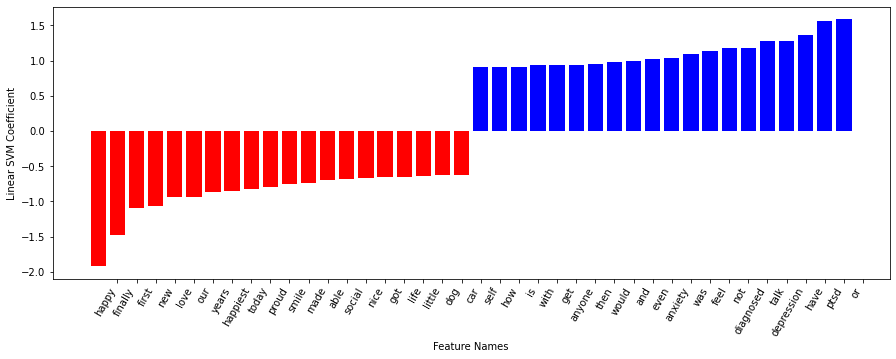

In [ ]:
#plotting top n features and their coefficients
plot_coefficients(SVM, Tfidf_vect.get_feature_names())

optimisasi model

In [ ]:
#initializing tfidf vectorizer and an SVM classifier instance
tfidf = TfidfVectorizer()
clf = svm.SVC()

In [ ]:
#constructing the pipeline
pipe = Pipeline([
    ('tfidf', tfidf),
    ('clf', clf)
])

In [ ]:

linear_grid = {'tfidf__max_features': [500, 1000, 5000, None],
    'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)],
    'clf__C': np.logspace(-1, 3, 5),
    'clf__kernel' : ['linear']}
    
poly_grid = {'tfidf__max_features': [500, 1000, 5000, None],
    'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)],
    'clf__C': np.logspace(-1, 3, 5),
    'clf__kernel' : ['poly'],
    'clf__degree' : [2, 3],
    'clf__gamma': np.logspace(-2, 2, 5)}

rbf_grid = {'tfidf__max_features': [500, 1000, 5000, None],
    'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)],
    'clf__C': np.logspace(-1, 3, 5),
    'clf__kernel' : ['rbf'],
    'clf__gamma': np.logspace(-2, 2, 5)}

In [ ]:
scv_linear = RandomizedSearchCV(pipe, param_distributions = linear_grid, n_iter = 10, cv = 5, verbose = 2, n_jobs = -1, return_train_score = True, random_state = 42)
scv_linear.fit(X_train, y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    7.9s finished


In [ ]:

scv_poly = RandomizedSearchCV(pipe, param_distributions = poly_grid, n_iter = 10, cv = 5, verbose = 2, n_jobs = -1, return_train_score = True, random_state = 42)
scv_poly.fit(X_train, y_train);

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   10.9s finished


In [ ]:

scv_rbf = RandomizedSearchCV(pipe, param_distributions = rbf_grid, n_iter = 10, cv = 5, verbose = 2, n_jobs = -1, return_train_score = True, random_state = 42)
scv_rbf.fit(X_train, y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   11.8s finished


In [ ]:
#preview randomized gridsearch results
pd.DataFrame(scv_linear.cv_results_)[['params', 'mean_train_score', 'mean_test_score']]

,params,mean_train_score,mean_test_score
0,"{'tfidf__ngram_range': (1, 1), 'tfidf__max_fea...",0.927536,0.873846
1,"{'tfidf__ngram_range': (1, 3), 'tfidf__max_fea...",0.934170,0.876020
2,"{'tfidf__ngram_range': (1, 1), 'tfidf__max_fea...",1.000000,0.871722
3,"{'tfidf__ngram_range': (1, 1), 'tfidf__max_fea...",1.000000,0.915922
4,"{'tfidf__ngram_range': (1, 2), 'tfidf__max_fea...",0.980645,0.891575
5,"{'tfidf__ngram_range': (1, 1), 'tfidf__max_fea...",1.000000,0.915922
6,"{'tfidf__ngram_range': (1, 1), 'tfidf__max_fea...",1.000000,0.915922
7,"{'tfidf__ngram_range': (1, 1), 'tfidf__max_fea...",1.000000,0.871722
8,"{'tfidf__ngram_range': (1, 1), 'tfidf__max_fea...",0.986173,0.904762
9,"{'tfidf__ngram_range': (1, 1), 'tfidf__max_fea...",1.000000,0.915922


In [ ]:
pd.DataFrame(scv_poly.cv_results_)[['params', 'mean_train_score', 'mean_test_score']]

,params,mean_train_score,mean_test_score
0,"{'tfidf__ngram_range': (1, 3), 'tfidf__max_fea...",1.000000,0.858266
1,"{'tfidf__ngram_range': (1, 3), 'tfidf__max_fea...",1.000000,0.827326
2,"{'tfidf__ngram_range': (1, 2), 'tfidf__max_fea...",1.000000,0.858242
3,"{'tfidf__ngram_range': (1, 3), 'tfidf__max_fea...",0.800554,0.671136
4,"{'tfidf__ngram_range': (1, 2), 'tfidf__max_fea...",0.792267,0.631136
5,"{'tfidf__ngram_range': (1, 3), 'tfidf__max_fea...",1.000000,0.893773
6,"{'tfidf__ngram_range': (1, 2), 'tfidf__max_fea...",0.800554,0.704469
7,"{'tfidf__ngram_range': (1, 2), 'tfidf__max_fea...",1.000000,0.858242
8,"{'tfidf__ngram_range': (1, 1), 'tfidf__max_fea...",0.800554,0.635580
9,"{'tfidf__ngram_range': (1, 2), 'tfidf__max_fea...",1.000000,0.858242


In [ ]:
pd.DataFrame(scv_rbf.cv_results_)[['params', 'mean_train_score', 'mean_test_score']]

,params,mean_train_score,mean_test_score
0,"{'tfidf__ngram_range': (1, 3), 'tfidf__max_fea...",1.000000,0.845079
1,"{'tfidf__ngram_range': (1, 3), 'tfidf__max_fea...",1.000000,0.891600
2,"{'tfidf__ngram_range': (1, 3), 'tfidf__max_fea...",1.000000,0.891526
3,"{'tfidf__ngram_range': (1, 1), 'tfidf__max_fea...",0.749173,0.708913
4,"{'tfidf__ngram_range': (1, 3), 'tfidf__max_fea...",1.000000,0.500024
5,"{'tfidf__ngram_range': (1, 2), 'tfidf__max_fea...",1.000000,0.500024
6,"{'tfidf__ngram_range': (1, 2), 'tfidf__max_fea...",1.000000,0.880537
7,"{'tfidf__ngram_range': (1, 2), 'tfidf__max_fea...",1.000000,0.500024
8,"{'tfidf__ngram_range': (1, 3), 'tfidf__max_fea...",0.760775,0.724469
9,"{'tfidf__ngram_range': (1, 2), 'tfidf__max_fea...",1.000000,0.497802


In [ ]:
#preview the best parameters as found by the gridsearch
scv_linear.best_params_

{'clf__C': 100.0,
 'clf__kernel': 'linear',
 'tfidf__max_features': None,
 'tfidf__ngram_range': (1, 1)}

In [ ]:
#selecting the classifier with the hyperparameters yielding the highest average cross-validation score
best_clf = scv_linear.best_estimator_

Evaluasi model

In [ ]:
# Use accuracy_score function to get the accuracy
print("SVM Training Accuracy Score -> ", best_clf.score(X_train, y_train)*100)
print("SVM Testing Accuracy Score -> ", best_clf.score(X_test, y_test)*100)

SVM Training Accuracy Score ->  100.0
SVM Testing Accuracy Score ->  94.84536082474226


In [ ]:
#obtaining predictions and decision function scores   
Pred_Y = best_clf.predict(X_test)
Score_Y = best_clf.decision_function(X_test)

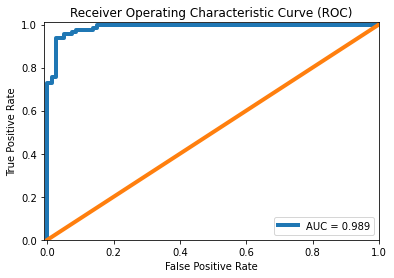

In [ ]:
#plotting the Receiver Operating Characteristic (ROC) Curve
false_pos_rate, true_pos_rate, thresholds = roc_curve(y_test, Score_Y)
roc_auc = auc(false_pos_rate, true_pos_rate,)

plt.plot(false_pos_rate, true_pos_rate, linewidth=4, label='AUC = %0.3f'% roc_auc)
plt.plot([0,1],[0,1], linewidth=4)

plt.xlim([-0.01, 1])
plt.ylim([0, 1.01])
plt.legend(loc='lower right')
plt.title('Receiver Operating Characteristic Curve (ROC)')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

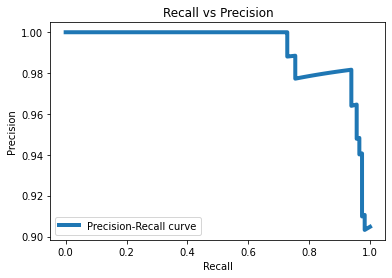

In [ ]:

#Plotting Precision versus Recall
precision_rate, recall_rate, threshold_rate = precision_recall_curve(y_test, Score_Y)
plt.plot(recall_rate, precision_rate, linewidth=4, label='Precision-Recall curve')
plt.title('Recall vs Precision')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

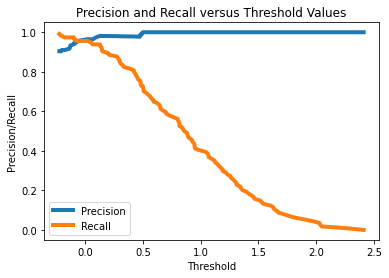

In [ ]:
#Plotting Precision and Recall for different Threshold values
plt.plot(threshold_rate, precision_rate[1:], label="Precision",linewidth=4)
plt.plot(threshold_rate, recall_rate[1:], label="Recall",linewidth=4)
plt.title('Precision and Recall versus Threshold Values')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')
plt.legend()
plt.show()

confusion matrix

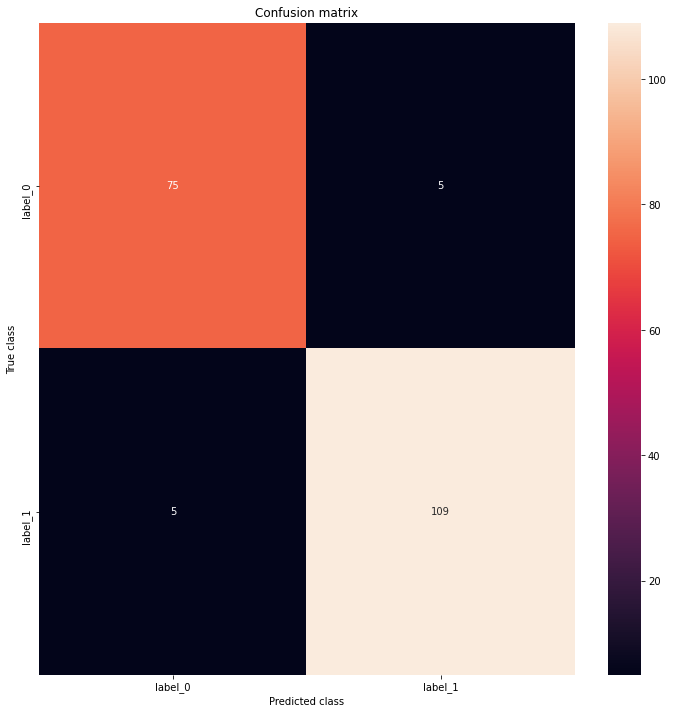

In [ ]:
#creating and displaying confusion matrix
LABELS = ['label_0', 'label_1']
conf_matrix = confusion_matrix(y_test, Pred_Y)
plt.figure(figsize=(12, 12))
sb.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [ ]:
wrong_classified = Pred_Y != y_test

In [ ]:
wrong_classified

2      False
6      False
7      False
10     False
11     False
       ...  
627    False
633    False
641    False
642    False
644    False
Name: label, Length: 194, dtype: bool

In [ ]:
wrong_data = testdata[wrong_classified == True]
wrong_labels = Pred_Y[wrong_classified == True]

In [ ]:
false_positivepre1 = wrong_data[wrong_labels == 1] 

In [ ]:
len(false_positivepre1)

5

In [ ]:
false_positivepre1

,text,label
65,am the only one allowed to wear a cap at work ...,0
311,my daily routine lately that has worked wonder...,0
516,as part of my maed program i get to work at th...,0
558,for the first time ever i feel so free around ...,0
617,ive got my birthday party tonight with most of...,0


In [ ]:
false_negativepre1= wrong_data[wrong_labels == 0] 

In [ ]:
len(false_negativepre1)

5

In [ ]:
false_negativepre1 

,text,label
29,cat was laying on my computer chair in my room...,1
43,what can i do to make up for a friend after a ...,1
176,what is the worst side effect of medication tr...,1
506,ive been an adult my whole life i always had t...,1
546,hi all so ive been depressed my whole life and...,1


classificaton report

In [ ]:
#generating and printing a classification report
print(classification_report(y_test, Pred_Y))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        80
           1       0.96      0.96      0.96       114

    accuracy                           0.95       194
   macro avg       0.95      0.95      0.95       194
weighted avg       0.95      0.95      0.95       194



In [ ]:

print("Accuracy score: ", accuracy_score(y_test,Pred_Y))

Accuracy score:  0.9484536082474226


# DFPRE1 + fitur seleksi

In [ ]:

from sklearn.feature_selection import SelectKBest, chi2


In [ ]:

ch = SelectKBest(chi2)
clf = svm.SVC()
# tfidf = TfidfVectorizer()

#constructing the pipeline
pipe = Pipeline([
    # ('tfidf', tfidf),
    ('chi2', ch),
    ('clf', clf)
])

para = {"chi2__k" : np.arange(50, 3300, 250)}

estimator = GridSearchCV(pipe,para)
estimator.fit(Train_X_Tfidf.toarray(), y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('chi2',
                                        SelectKBest(k=10,
                                                    score_func=<function chi2 at 0x7fe12e7010d0>)),
                                       ('clf',
                                        SVC(C=1.0, break_ties=False,
                                            cache_size=200, class_weight=None,
                                            coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='scale',
                                            kernel='rbf', max_iter=-1,
                                            probability=False,
                                            random_state=None, shrinking=True,
                                            tol=0.001, verbose=False))],
                              

In [ ]:

score = estimator.best_score_
estimator.best_params_


{'chi2__k': 3050}

In [ ]:
print ("Select feature for training set via Chi2 ...")

ch = SelectKBest(chi2, k=3050)


x_train_feature_selected=ch.fit_transform(Train_X_Tfidf, y_train)
print ("Select feature for testset via Chi2 ...")
x_test_chi_selected = ch.transform(Test_X_Tfidf)
print ("Finished")

Select feature for training set via Chi2 ...
Select feature for testset via Chi2 ...
Finished


In [ ]:
# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
SVM = svm.SVC(kernel = 'linear')
SVM.fit(x_train_feature_selected, y_train)


# Use accuracy_score function to get the accuracy
print("SVM Training Accuracy Score -> ", SVM.score(x_train_feature_selected, y_train)*100)
print("SVM Testing Accuracy Score -> ", SVM.score(x_test_chi_selected, y_test)*100)

SVM Training Accuracy Score ->  99.5575221238938
SVM Testing Accuracy Score ->  93.81443298969072


In [ ]:

ch = SelectKBest(chi2, k=3050)
clf = svm.SVC()
tfidf = TfidfVectorizer()

pipe = Pipeline([
    ('tfidf', tfidf),
    ('chi2', ch),
    ('clf', clf)
])

In [ ]:

linear_grid = {'tfidf__max_features': [500, 1000, 5000, None],
    'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)],
    'clf__C': np.logspace(-1, 3, 5),
    'clf__kernel' : ['linear']}
    
poly_grid = {'tfidf__max_features': [500, 1000, 5000, None],
    'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)],
    'clf__C': np.logspace(-1, 3, 5),
    'clf__kernel' : ['poly'],
    'clf__degree' : [2, 3],
    'clf__gamma': np.logspace(-2, 2, 5)}

rbf_grid = {'tfidf__max_features': [500, 1000, 5000, None],
    'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)],
    'clf__C': np.logspace(-1, 3, 5),
    'clf__kernel' : ['rbf'],
    'clf__gamma': np.logspace(-2, 2, 5)}

In [ ]:
scv_linear = RandomizedSearchCV(pipe, param_distributions = linear_grid, n_iter = 10, cv = 5, verbose = 2, n_jobs = -1, return_train_score = True, random_state = 42)
scv_linear.fit(X_train, y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  47 out of  50 | elapsed:    3.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    3.7s finished


In [ ]:
#using a randomized grid search to find the optimal value of the hyperparameters over a 5-fold cross-validation
scv_poly = RandomizedSearchCV(pipe, param_distributions = poly_grid, n_iter = 10, cv = 5, verbose = 2, n_jobs = -1, return_train_score = True, random_state = 42)
scv_poly.fit(X_train, y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    6.5s finished


In [ ]:
#using a randomized grid search to find the optimal value of the hyperparameters over a 5-fold cross-validation
scv_rbf = RandomizedSearchCV(pipe, param_distributions = rbf_grid, n_iter = 10, cv = 5, verbose = 2, n_jobs = -1, return_train_score = True, random_state = 42)
scv_rbf.fit(X_train, y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    7.5s finished


In [ ]:
#preview the best parameters as found by the gridsearch
scv_linear.best_params_

{'clf__C': 100.0,
 'clf__kernel': 'linear',
 'tfidf__max_features': None,
 'tfidf__ngram_range': (1, 1)}

In [ ]:
#selecting the classifier with the hyperparameters yielding the highest average cross-validation score
best_clfchi = scv_linear.best_estimator_
best_clfchi

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='...
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('chi2',
                 SelectKBest(k=3050,
                             score_func=<function chi2 at 0x7fe12e7010d0>)),
                ('clf',
                 SVC(C=1

evaluasi model

In [ ]:

# Use accuracy_score function to get the accuracy
print("SVM Training Accuracy Score with chi square -> ", best_clfchi.score(X_train, y_train)*100)
print("SVM Testing Accuracy Score with chi square -> ", best_clfchi.score(X_test, y_test)*100)



SVM Training Accuracy Score with chi square ->  100.0
SVM Testing Accuracy Score with chi square ->  94.3298969072165


In [ ]:
#obtaining predictions and decision function scores
Pred_Ychi = best_clfchi.predict(X_test)
Score_Ychi = best_clfchi.decision_function(X_test)

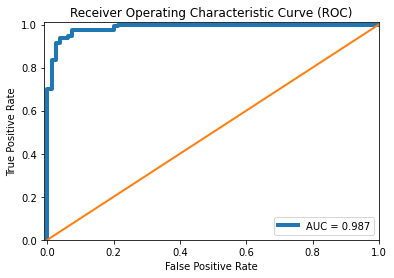

In [ ]:
#plotting the Receiver Operating Characteristic (ROC) Curve
false_pos_rate, true_pos_rate, thresholds = roc_curve(y_test, Score_Ychi)
roc_auc = auc(false_pos_rate, true_pos_rate,)

plt.plot(false_pos_rate, true_pos_rate, linewidth=4, label='AUC = %0.3f'% roc_auc)
plt.plot([0,1],[0,1], linewidth=2)

plt.xlim([-0.01, 1])
plt.ylim([0, 1.01])
plt.legend(loc='lower right')
plt.title('Receiver Operating Characteristic Curve (ROC)')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

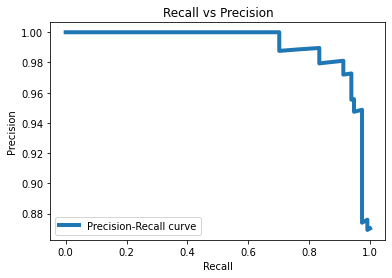

In [ ]:
#Plotting Precision versus Recall
precision_rate, recall_rate, threshold_rate = precision_recall_curve(y_test, Score_Ychi)
plt.plot(recall_rate, precision_rate, linewidth=4, label='Precision-Recall curve')
plt.title('Recall vs Precision')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

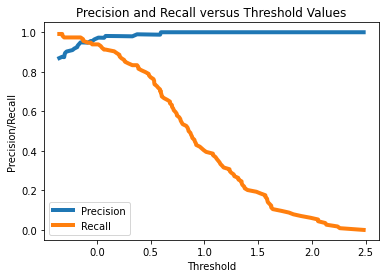

In [ ]:
#Plotting Precision and Recall for different Threshold values
plt.plot(threshold_rate, precision_rate[1:], label="Precision",linewidth=4)
plt.plot(threshold_rate, recall_rate[1:], label="Recall",linewidth=4)
plt.title('Precision and Recall versus Threshold Values')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')
plt.legend()
plt.show()

In [ ]:
#generating and printing a classification report
print(classification_report(y_test, Pred_Ychi))

              precision    recall  f1-score   support

           0       0.92      0.95      0.93        80
           1       0.96      0.94      0.95       114

    accuracy                           0.94       194
   macro avg       0.94      0.94      0.94       194
weighted avg       0.94      0.94      0.94       194



In [ ]:

print("Accuracy score with chi square: ", accuracy_score(y_test,Pred_Ychi))

Accuracy score with chi square:  0.9432989690721649


# DFStemPre1

In [ ]:
!wget -O trainStem.csv https://raw.githubusercontent.com/godhi06/TA/master/data/traintesbaru/dfTrain_Pre1stem.csv
!wget -O testStem.csv https://raw.githubusercontent.com/godhi06/TA/master/data/traintesbaru/dfTest_Pre1stem.csv

traindataStem = pd.read_csv('trainStem.csv', index_col=0) 
testdataStem = pd.read_csv('testStem.csv', index_col=0) 

--2020-07-18 03:42:50--  https://raw.githubusercontent.com/godhi06/TA/master/data/traintesbaru/dfTrain_Pre1stem.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 137692 (134K) [text/plain]
Saving to: ‘trainStem.csv’

trainStem.csv       100%[===================>] 134.46K  --.-KB/s    in 0.04s   

2020-07-18 03:42:50 (3.26 MB/s) - ‘trainStem.csv’ saved [137692/137692]

--2020-07-18 03:42:52--  https://raw.githubusercontent.com/godhi06/TA/master/data/traintesbaru/dfTest_Pre1stem.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58421 (57K

In [ ]:

# defining predictor and target features
X_trainStem = traindataStem['text']
y_trainStem = traindataStem['label']

X_testStem = testdataStem['text']
y_testStem = testdataStem['label']

In [ ]:
#encoding the corpus using Term Frequency - Inverse Document Frequency Encoding
Tfidf_vect = TfidfVectorizer()

In [ ]:
#fitting encoder on training data
Tfidf_vect.fit(X_trainStem)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [ ]:

#Transforming the corpus for the training and testing data
Train_XStem_Tfidf = Tfidf_vect.transform(X_trainStem)
Test_XStem_Tfidf = Tfidf_vect.transform(X_testStem)

In [ ]:
#preview vocabulary vector
print(Tfidf_vect.vocabulary_)

{'have': 1106, 'had': 1073, 'major': 1441, 'depress': 630, 'disord': 677, 'for': 939, 'mani': 1451, 'year': 2716, 'now': 1621, 'and': 90, 'it': 1291, 'got': 1031, 'to': 2431, 'the': 2383, 'point': 1781, 'sometim': 2193, 'last': 1360, 'where': 2649, 'did': 653, 'not': 1615, 'energi': 785, 'or': 1663, 'abil': 1, 'practic': 1802, 'person': 1746, 'hygien': 1196, 'such': 2298, 'as': 144, 'shower': 2113, 'daili': 585, 'brush': 333, 'my': 1572, 'teeth': 2360, 'brace': 307, 'on': 1650, 'few': 892, 'month': 1544, 'ago': 55, 'am': 78, 'hopeless': 1167, 'at': 158, 'care': 383, 'them': 2386, 'never': 1593, 'use': 2558, 'befor': 224, 'due': 726, 'is': 1285, 'just': 1317, 'dawn': 596, 'upon': 2551, 'me': 1474, 'that': 2381, 'in': 1228, 'veri': 2575, 'long': 1415, 'time': 2426, 'like': 1400, 'least': 1374, 'week': 2626, 'probabl': 1825, 'two': 2494, 'alreadi': 71, 'awar': 183, 'will': 2665, 'be': 213, 'kind': 1330, 'of': 1637, 'fuck': 975, 'but': 356, 'there': 2391, 'ani': 96, 'chanc': 399, 'might': 

In [ ]:
#preview transformed training data
print(Train_XStem_Tfidf)

  (0, 2716)	0.09427926819251112
  (0, 2665)	0.05436384403614528
  (0, 2656)	0.10194338763209686
  (0, 2649)	0.06711120249796014
  (0, 2647)	0.05283123294203598
  (0, 2626)	0.06468423474654245
  (0, 2575)	0.06660057445292611
  (0, 2558)	0.06817522160542498
  (0, 2551)	0.12297897514126627
  (0, 2494)	0.07706547465609918
  (0, 2431)	0.104173429670869
  (0, 2426)	0.05210860314797971
  (0, 2405)	0.08439878698180997
  (0, 2391)	0.05917586616892968
  (0, 2386)	0.12269163550782068
  (0, 2383)	0.08111475660404951
  (0, 2381)	0.03802664380453562
  (0, 2360)	0.4949590014955147
  (0, 2298)	0.09033745269949027
  (0, 2222)	0.10970699709787518
  (0, 2193)	0.08316304101109301
  (0, 2113)	0.1054343744909794
  (0, 1825)	0.17427759698919296
  (0, 1802)	0.1054343744909794
  (0, 1781)	0.07889041840419722
  :	:
  (451, 1101)	0.10429167516512015
  (451, 1033)	0.12611499274920276
  (451, 1019)	0.0703525150306327
  (451, 1004)	0.06450585967163086
  (451, 994)	0.2472354806584631
  (451, 939)	0.0478861880245201


In [ ]:
# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
SVM = svm.SVC(kernel = 'linear')
SVM.fit(Train_XStem_Tfidf, y_trainStem)

# Use accuracy_score function to get the accuracy
print("SVM Training Accuracy Score -> ", SVM.score(Train_XStem_Tfidf, y_trainStem)*100)
print("SVM Testing Accuracy Score -> ", SVM.score(Test_XStem_Tfidf, y_testStem)*100)

SVM Training Accuracy Score ->  99.77876106194691
SVM Testing Accuracy Score ->  95.36082474226805


In [ ]:
def plot_coefficients(classifier, feature_names, top_features=20):
    
    """This function visualizes the text features with the top n positive coefficients and the top n negative coefficients to
    gain insight as to what the strongest predictors of the target features are.
    
    classifier: an SVM classifier with a linear kernel
    feature_names: names of the features as provided by a TF-IDF embedder (accessed using the .get_feature_names attribute)
    top_features: the number of features with positive and negative coefficients to display, default value is 20
    """
    
    #converting coefficient matrix from sparse to dense and then unravelling it
    coef = np.ravel(classifier.coef_.reshape(-1, 1).todense())
    #getting the top n positive coefficients
    tpc = np.argsort(coef)[-top_features:]
    #getting the top n negative coefficients
    tnc = np.argsort(coef)[:top_features]
    #stacking them to form one array of top positive and negative coefficients
    top_coefficients = np.hstack([tnc, tpc])
    # creating plot
    plt.figure(figsize=(15, 5))
    #assigning color labels
    colors = ['red' if c < 0 else 'blue' for c in coef[top_coefficients]]
    #plotting data
    plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
    feature_names = np.array(feature_names)
    plt.xticks(np.arange(1, 1 + 2 * top_features), feature_names[top_coefficients], rotation=60, ha = 'right')
    plt.xlabel("Feature Names")
    plt.ylabel("Linear SVM Coefficient")
    plt.show()

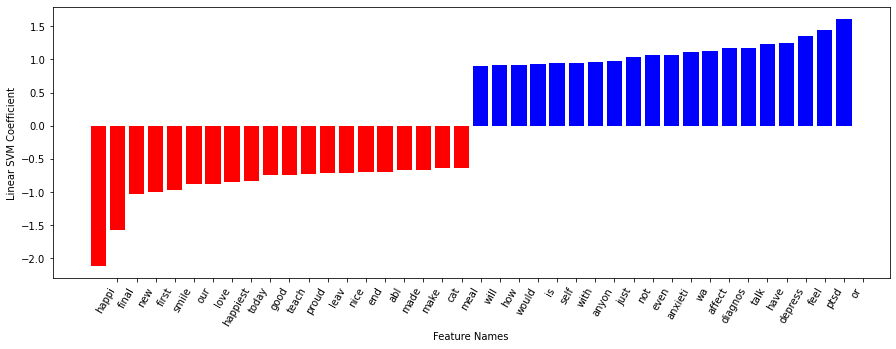

In [ ]:
#plotting top n features and their coefficients
plot_coefficients(SVM, Tfidf_vect.get_feature_names())

In [ ]:
#initializing tfidf vectorizer and an SVM classifier instance
tfidf = TfidfVectorizer()
clf = svm.SVC()

In [ ]:
#constructing the pipeline
pipe = Pipeline([
    ('tfidf', tfidf),
    ('clf', clf)
])

In [ ]:
linear_grid = {'tfidf__max_features': [500, 1000, 5000, None],
    'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)],
    'clf__C': np.logspace(-1, 3, 5),
    'clf__kernel' : ['linear']}
    
poly_grid = {'tfidf__max_features': [500, 1000, 5000, None],
    'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)],
    'clf__C': np.logspace(-1, 3, 5),
    'clf__kernel' : ['poly'],
    'clf__degree' : [2, 3],
    'clf__gamma': np.logspace(-2, 2, 5)}

rbf_grid = {'tfidf__max_features': [500, 1000, 5000, None],
    'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)],
    'clf__C': np.logspace(-1, 3, 5),
    'clf__kernel' : ['rbf'],
    'clf__gamma': np.logspace(-2, 2, 5)}

In [ ]:
scv_linear = RandomizedSearchCV(pipe, param_distributions = linear_grid, n_iter = 10, cv = 5, verbose = 2, n_jobs = -1, return_train_score = True, random_state = 42)
scv_linear.fit(X_trainStem, y_trainStem);

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    5.9s finished


In [ ]:
#using a randomized grid search to find the optimal value of the hyperparameters over a 5-fold cross-validation
scv_poly = RandomizedSearchCV(pipe, param_distributions = poly_grid, n_iter = 10, cv = 5, verbose = 2, n_jobs = -1, return_train_score = True, random_state = 42)
scv_poly.fit(X_trainStem, y_trainStem);

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   10.8s finished


In [ ]:
#using a randomized grid search to find the optimal value of the hyperparameters over a 5-fold cross-validation
scv_rbf = RandomizedSearchCV(pipe, param_distributions = rbf_grid, n_iter = 10, cv = 5, verbose = 2, n_jobs = -1, return_train_score = True, random_state = 42)
scv_rbf.fit(X_trainStem, y_trainStem);

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   11.6s finished


In [ ]:
#preview randomized gridsearch results
pd.DataFrame(scv_linear.cv_results_)[['params', 'mean_train_score', 'mean_test_score']]

,params,mean_train_score,mean_test_score
0,"{'tfidf__ngram_range': (1, 1), 'tfidf__max_fea...",0.934729,0.882637
1,"{'tfidf__ngram_range': (1, 3), 'tfidf__max_fea...",0.931960,0.880440
2,"{'tfidf__ngram_range': (1, 1), 'tfidf__max_fea...",1.000000,0.889304
3,"{'tfidf__ngram_range': (1, 1), 'tfidf__max_fea...",1.000000,0.918120
4,"{'tfidf__ngram_range': (1, 2), 'tfidf__max_fea...",0.982302,0.878291
5,"{'tfidf__ngram_range': (1, 1), 'tfidf__max_fea...",1.000000,0.918120
6,"{'tfidf__ngram_range': (1, 1), 'tfidf__max_fea...",1.000000,0.918120
7,"{'tfidf__ngram_range': (1, 1), 'tfidf__max_fea...",1.000000,0.889304
8,"{'tfidf__ngram_range': (1, 1), 'tfidf__max_fea...",0.991702,0.895897
9,"{'tfidf__ngram_range': (1, 1), 'tfidf__max_fea...",1.000000,0.918120


In [ ]:
pd.DataFrame(scv_poly.cv_results_)[['params', 'mean_train_score', 'mean_test_score']]

,params,mean_train_score,mean_test_score
0,"{'tfidf__ngram_range': (1, 3), 'tfidf__max_fea...",1.000000,0.860537
1,"{'tfidf__ngram_range': (1, 3), 'tfidf__max_fea...",1.000000,0.833993
2,"{'tfidf__ngram_range': (1, 2), 'tfidf__max_fea...",1.000000,0.856093
3,"{'tfidf__ngram_range': (1, 3), 'tfidf__max_fea...",0.800554,0.671136
4,"{'tfidf__ngram_range': (1, 2), 'tfidf__max_fea...",0.784532,0.611136
5,"{'tfidf__ngram_range': (1, 3), 'tfidf__max_fea...",1.000000,0.891526
6,"{'tfidf__ngram_range': (1, 2), 'tfidf__max_fea...",0.800554,0.702247
7,"{'tfidf__ngram_range': (1, 2), 'tfidf__max_fea...",1.000000,0.856093
8,"{'tfidf__ngram_range': (1, 1), 'tfidf__max_fea...",0.800554,0.611136
9,"{'tfidf__ngram_range': (1, 2), 'tfidf__max_fea...",1.000000,0.856093


In [ ]:
pd.DataFrame(scv_rbf.cv_results_)[['params', 'mean_train_score', 'mean_test_score']]

,params,mean_train_score,mean_test_score
0,"{'tfidf__ngram_range': (1, 3), 'tfidf__max_fea...",1.000000,0.849524
1,"{'tfidf__ngram_range': (1, 3), 'tfidf__max_fea...",1.000000,0.893797
2,"{'tfidf__ngram_range': (1, 3), 'tfidf__max_fea...",1.000000,0.891502
3,"{'tfidf__ngram_range': (1, 1), 'tfidf__max_fea...",0.738676,0.713358
4,"{'tfidf__ngram_range': (1, 3), 'tfidf__max_fea...",1.000000,0.500024
5,"{'tfidf__ngram_range': (1, 2), 'tfidf__max_fea...",1.000000,0.500024
6,"{'tfidf__ngram_range': (1, 2), 'tfidf__max_fea...",1.000000,0.893846
7,"{'tfidf__ngram_range': (1, 2), 'tfidf__max_fea...",1.000000,0.497802
8,"{'tfidf__ngram_range': (1, 3), 'tfidf__max_fea...",0.763537,0.717802
9,"{'tfidf__ngram_range': (1, 2), 'tfidf__max_fea...",1.000000,0.497802


In [ ]:
#preview the best parameters as found by the gridsearch 

scv_linear.best_params_

{'clf__C': 100.0,
 'clf__kernel': 'linear',
 'tfidf__max_features': None,
 'tfidf__ngram_range': (1, 1)}

In [ ]:

#selecting the classifier with the hyperparameters yielding the highest average cross-validation score
best_clf = scv_linear.best_estimator_

evaluasi model

In [ ]:
# Use accuracy_score function to get the accuracy
print("SVM Training Accuracy Score -> ", best_clf.score(X_trainStem, y_trainStem)*100)
print("SVM Testing Accuracy Score -> ", best_clf.score(X_testStem, y_testStem)*100)


SVM Training Accuracy Score ->  100.0
SVM Testing Accuracy Score ->  95.36082474226805


In [ ]:
#obtaining predictions and decision function scores
Pred_YStem = best_clf.predict(X_testStem)
Score_YStem = best_clf.decision_function(X_testStem)

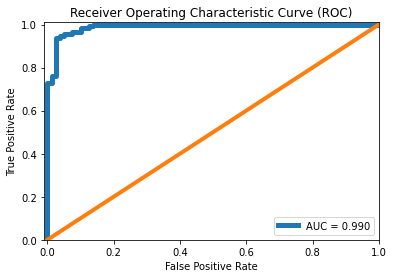

In [ ]:
#plotting the Receiver Operating Characteristic (ROC) Curve
false_pos_rate, true_pos_rate, thresholds = roc_curve(y_testStem, Score_YStem)
roc_auc = auc(false_pos_rate, true_pos_rate,)

plt.plot(false_pos_rate, true_pos_rate, linewidth=5, label='AUC = %0.3f'% roc_auc)
plt.plot([0,1],[0,1], linewidth=4)

plt.xlim([-0.01, 1])
plt.ylim([0, 1.01])
plt.legend(loc='lower right')
plt.title('Receiver Operating Characteristic Curve (ROC)')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

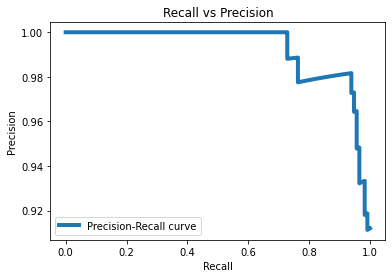

In [ ]:

#Plotting Precision versus Recall
precision_rate, recall_rate, threshold_rate = precision_recall_curve(y_testStem, Score_YStem)
plt.plot(recall_rate, precision_rate, linewidth=4, label='Precision-Recall curve')
plt.title('Recall vs Precision')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

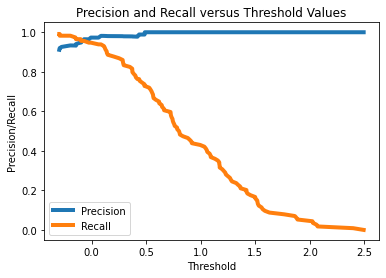

In [ ]:
#Plotting Precision and Recall for different Threshold values
plt.plot(threshold_rate, precision_rate[1:], label="Precision",linewidth=4)
plt.plot(threshold_rate, recall_rate[1:], label="Recall",linewidth=4)
plt.title('Precision and Recall versus Threshold Values')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')
plt.legend()
plt.show()

confusion matrix

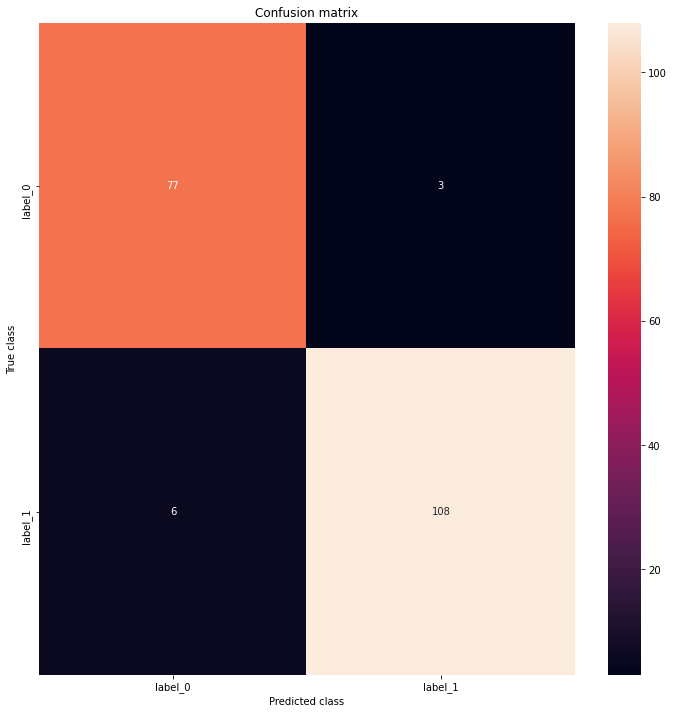

In [ ]:
#creating and displaying confusion matrix
LABELS = ['label_0', 'label_1']
conf_matrix = confusion_matrix(y_testStem, Pred_YStem)
plt.figure(figsize=(12, 12))
sb.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [ ]:
wrong_classifiedstem1 = Pred_YStem != y_testStem

In [ ]:
wrong_classifiedstem1

2      False
6      False
7      False
10     False
11     False
       ...  
627    False
633    False
641    False
642    False
644    False
Name: label, Length: 194, dtype: bool

In [ ]:
wrong_data = testdataStem[wrong_classifiedstem1 == True]
wrong_labels = Pred_YStem[wrong_classifiedstem1 == True]

In [ ]:
false_positivestem1 = wrong_data[wrong_labels == 1] 

In [ ]:

len(false_positivestem1)


3

In [ ]:

false_negativestem = wrong_data[wrong_labels == 0]  

In [ ]:

len(false_negativestem)


6

In [ ]:
false_negativestem

,text,label
29,cat wa lay on my comput chair in my room i wa ...,1
43,what can i do to make up for a friend after a ...,1
176,what is the worst side effect of medic treatme...,1
506,ive been an adult my whole life i alway had to...,1
546,hi all so ive been depress my whole life and t...,1
615,cbd oil medic marijuana or tradit psychiatrist...,1


classification report

In [ ]:
#generating and printing a classification report
print(classification_report(y_testStem, Pred_YStem))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94        80
           1       0.97      0.95      0.96       114

    accuracy                           0.95       194
   macro avg       0.95      0.95      0.95       194
weighted avg       0.95      0.95      0.95       194



In [ ]:

print("Accuracy score: ", accuracy_score(y_testStem,Pred_YStem))

Accuracy score:  0.9536082474226805


# DFStemPre1 + fitur seleksi

In [ ]:

from sklearn.feature_selection import SelectKBest, chi2


In [ ]:

chstem = SelectKBest(chi2)
clfstem = svm.SVC()
# tfidf = TfidfVectorizer()

#constructing the pipeline
pipestem = Pipeline([
    # ('tfidf', tfidf),
    ('chi2', chstem),
    ('clf', clfstem)
])

para = {"chi2__k" : np.arange(100, 2800, 250)}

estimatostem = GridSearchCV(pipestem,para)
estimatostem.fit(Train_XStem_Tfidf.toarray(), y_trainStem)



GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('chi2',
                                        SelectKBest(k=10,
                                                    score_func=<function chi2 at 0x7fe12e7010d0>)),
                                       ('clf',
                                        SVC(C=1.0, break_ties=False,
                                            cache_size=200, class_weight=None,
                                            coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='scale',
                                            kernel='rbf', max_iter=-1,
                                            probability=False,
                                            random_state=None, shrinking=True,
                                            tol=0.001, verbose=False))],
                              

In [ ]:

scorestem = estimatostem.best_score_
beststem = estimatostem.best_params_

beststem

{'chi2__k': 350}

In [ ]:
print ("Select feature for training set via Chi2 ...")

chstem = SelectKBest(chi2, k=350)


x_trainstem_feature_selected=chstem.fit_transform(Train_XStem_Tfidf, y_trainStem)
print ("Select feature for testset via Chi2 ...")
x_teststem_chi_selected = chstem.transform(Test_XStem_Tfidf)
print ("Finished")

Select feature for training set via Chi2 ...
Select feature for testset via Chi2 ...
Finished


In [ ]:
# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
SVMstem = svm.SVC(kernel = 'linear')
SVMstem.fit(x_trainstem_feature_selected, y_trainStem)


# Use accuracy_score function to get the accuracy
print("SVM Training Accuracy Score -> ", SVMstem.score(x_trainstem_feature_selected, y_trainStem)*100)
print("SVM Testing Accuracy Score -> ", SVMstem.score(x_teststem_chi_selected, y_testStem)*100)

SVM Training Accuracy Score ->  97.12389380530973
SVM Testing Accuracy Score ->  93.81443298969072


In [ ]:

chstem = SelectKBest(chi2, k=350)
clfstem = svm.SVC()
tfidfstem = TfidfVectorizer()

pipestem = Pipeline([
    ('tfidf', tfidfstem),
    ('chi2', chstem),
    ('clf', clfstem)
])

In [ ]:

linear_grid = {'tfidf__max_features': [500, 1000, 5000, None],
    'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)],
    'clf__C': np.logspace(-1, 3, 5),
    'clf__kernel' : ['linear']}
    
poly_grid = {'tfidf__max_features': [500, 1000, 5000, None],
    'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)],
    'clf__C': np.logspace(-1, 3, 5),
    'clf__kernel' : ['poly'],
    'clf__degree' : [2, 3],
    'clf__gamma': np.logspace(-2, 2, 5)}

rbf_grid = {'tfidf__max_features': [500, 1000, 5000, None],
    'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)],
    'clf__C': np.logspace(-1, 3, 5),
    'clf__kernel' : ['rbf'],
    'clf__gamma': np.logspace(-2, 2, 5)}

In [ ]:
scv_linear = RandomizedSearchCV(pipestem, param_distributions = linear_grid, n_iter = 10, cv = 5, verbose = 2, n_jobs = -1, return_train_score = True, random_state = 42)
scv_linear.fit(X_trainStem, y_trainStem);

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    4.3s finished


In [ ]:
#using a randomized grid search to find the optimal value of the hyperparameters over a 5-fold cross-validation
scv_poly = RandomizedSearchCV(pipestem, param_distributions = poly_grid, n_iter = 10, cv = 5, verbose = 2, n_jobs = -1, return_train_score = True, random_state = 42)
scv_poly.fit(X_trainStem, y_trainStem);

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    8.2s finished


In [ ]:
#using a randomized grid search to find the optimal value of the hyperparameters over a 5-fold cross-validation
scv_rbf = RandomizedSearchCV(pipestem, param_distributions = rbf_grid, n_iter = 10, cv = 5, verbose = 2, n_jobs = -1, return_train_score = True, random_state = 42)
scv_rbf.fit(X_trainStem, y_trainStem);

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    8.2s finished


In [ ]:
#preview the best parameters as found by the gridsearch

scv_linear.best_params_

{'clf__C': 1.0,
 'clf__kernel': 'linear',
 'tfidf__max_features': 500,
 'tfidf__ngram_range': (1, 1)}

In [ ]:
#selecting the classifier with the hyperparameters yielding the highest average cross-validation score
best_clfchistem = scv_linear.best_estimator_
best_clfchistem


Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=500,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(...
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('chi2',
                 SelectKBest(k=350,
                             score_func=<function chi2 at 0x7fe12e7010d0>)),
                ('clf',
                 SVC(C=1.

In [ ]:

# Use accuracy_score function to get the accuracy
print("SVM Training Accuracy Score with chi square for data raw-> ", best_clfchistem.score(X_trainStem, y_trainStem)*100)
print("SVM Testing Accuracy Score with chi square for data raw -> ", best_clfchistem.score(X_testStem, y_testStem)*100)



SVM Training Accuracy Score with chi square for data raw->  98.23008849557522
SVM Testing Accuracy Score with chi square for data raw ->  93.81443298969072


In [ ]:
#obtaining predictions and decision function scores
Predstem_Ychi = best_clfchistem.predict(X_testStem)
Scorestem_Ychi = best_clfchistem.decision_function(X_testStem)

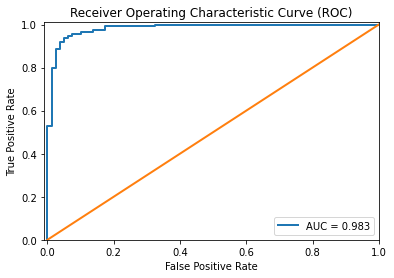

In [ ]:
#plotting the Receiver Operating Characteristic (ROC) Curve
false_pos_rate, true_pos_rate, thresholds = roc_curve(y_testStem, Scorestem_Ychi)
roc_auc = auc(false_pos_rate, true_pos_rate,)

plt.plot(false_pos_rate, true_pos_rate, linewidth=2, label='AUC = %0.3f'% roc_auc)
plt.plot([0,1],[0,1], linewidth=2)

plt.xlim([-0.01, 1])
plt.ylim([0, 1.01])
plt.legend(loc='lower right')
plt.title('Receiver Operating Characteristic Curve (ROC)')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

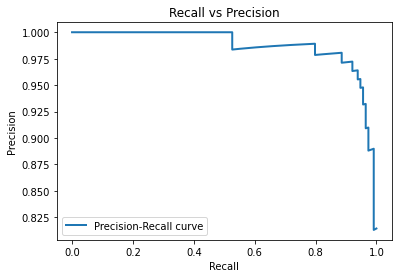

In [ ]:

#Plotting Precision versus Recall
precision_rate, recall_rate, threshold_rate = precision_recall_curve(y_testStem, Scorestem_Ychi)
plt.plot(recall_rate, precision_rate, linewidth=2, label='Precision-Recall curve')
plt.title('Recall vs Precision')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

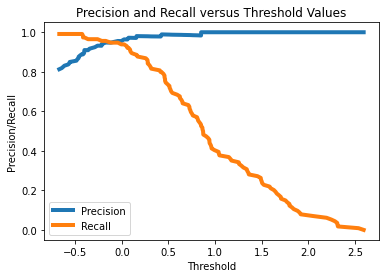

In [ ]:
#Plotting Precision and Recall for different Threshold values
plt.plot(threshold_rate, precision_rate[1:], label="Precision",linewidth=4)
plt.plot(threshold_rate, recall_rate[1:], label="Recall",linewidth=4)
plt.title('Precision and Recall versus Threshold Values')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')
plt.legend()
plt.show()

In [ ]:
#generating and printing a classification report
print(classification_report(y_testStem, Predstem_Ychi))

              precision    recall  f1-score   support

           0       0.91      0.94      0.93        80
           1       0.96      0.94      0.95       114

    accuracy                           0.94       194
   macro avg       0.93      0.94      0.94       194
weighted avg       0.94      0.94      0.94       194



In [ ]:

print("Accuracy score with chi square data raw: ", accuracy_score(y_testStem,Predstem_Ychi))

Accuracy score with chi square data raw:  0.9381443298969072


# DFLemmaPre1 

In [ ]:
!wget -O trainLem.csv https://raw.githubusercontent.com/godhi06/TA/master/data/traintesbaru/dfTrain_Pre1lem.csv
!wget -O testLem.csv https://raw.githubusercontent.com/godhi06/TA/master/data/traintesbaru/dfTest_Pre1lem.csv

traindataLem = pd.read_csv('trainLem.csv', index_col=0) 
testdataLem = pd.read_csv('testLem.csv', index_col=0) 

--2020-07-18 03:44:08--  https://raw.githubusercontent.com/godhi06/TA/master/data/traintesbaru/dfTrain_Pre1lem.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 147913 (144K) [text/plain]
Saving to: ‘trainLem.csv’

trainLem.csv        100%[===================>] 144.45K  --.-KB/s    in 0.04s   

2020-07-18 03:44:09 (3.47 MB/s) - ‘trainLem.csv’ saved [147913/147913]

--2020-07-18 03:44:10--  https://raw.githubusercontent.com/godhi06/TA/master/data/traintesbaru/dfTest_Pre1lem.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 62630 (61K) [t

In [ ]:
# defining predictor and target features
X_trainLem = traindataLem['text']
y_trainLem = traindataLem['label']

X_testLem = testdataLem['text']
y_testLem = testdataLem['label']

In [ ]:
#encoding the corpus using Term Frequency - Inverse Document Frequency Encoding
Tfidf_vect = TfidfVectorizer()

In [ ]:
#fitting encoder on training data
Tfidf_vect.fit(X_trainLem)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [ ]:

#Transforming the corpus for the training and testing data
Train_XLem_Tfidf = Tfidf_vect.transform(X_trainLem)
Test_XLem_Tfidf = Tfidf_vect.transform(X_testLem)

In [ ]:
#preview vocabulary vector
print(Tfidf_vect.vocabulary_)

{'have': 1339, 'had': 1296, 'major': 1752, 'depressive': 757, 'disorder': 816, 'for': 1143, 'many': 1768, 'year': 3280, 'now': 1962, 'and': 113, 'it': 1571, 'got': 1251, 'to': 2949, 'the': 2898, 'point': 2160, 'sometime': 2662, 'last': 1651, 'where': 3207, 'did': 785, 'not': 1954, 'energy': 950, 'or': 2011, 'ability': 1, 'practice': 2188, 'personal': 2109, 'hygiene': 1452, 'such': 2786, 'showering': 2573, 'daily': 698, 'brushing': 397, 'my': 1905, 'teeth': 2864, 'brace': 367, 'on': 1995, 'few': 1080, 'month': 1874, 'ago': 75, 'am': 101, 'hopeless': 1413, 'at': 196, 'caring': 455, 'them': 2901, 'never': 1930, 'used': 3093, 'brush': 395, 'before': 272, 'due': 882, 'depression': 755, 'is': 1565, 'just': 1600, 'dawned': 713, 'upon': 3085, 'me': 1790, 'that': 2895, 'brushed': 396, 'in': 1489, 'very': 3116, 'long': 1719, 'time': 2944, 'like': 1700, 'least': 1672, 'week': 3182, 'probably': 2214, 'two': 3021, 'already': 93, 'aware': 226, 'will': 3223, 'be': 259, 'kind': 1618, 'of': 1978, 'fuck

In [ ]:
#preview transformed training data
print(Train_XLem_Tfidf)

  (0, 3280)	0.0955858320657076
  (0, 3223)	0.055117242275095096
  (0, 3213)	0.10335616426841299
  (0, 3207)	0.06804125927875274
  (0, 3204)	0.05381388241143727
  (0, 3182)	0.06558065753286088
  (0, 3116)	0.06752355472401436
  (0, 3093)	0.07813348215113823
  (0, 3085)	0.12468327227002857
  (0, 3021)	0.07813348215113823
  (0, 2949)	0.10561711121787684
  (0, 2944)	0.052830747259417464
  (0, 2921)	0.08556842276840593
  (0, 2906)	0.0599959515427741
  (0, 2901)	0.12439195055662419
  (0, 2898)	0.08223888084253608
  (0, 2895)	0.038784741021481835
  (0, 2864)	0.501818362651638
  (0, 2786)	0.0915893891469894
  (0, 2697)	0.1112273652741774
  (0, 2662)	0.12468327227002857
  (0, 2573)	0.12468327227002857
  (0, 2214)	0.17669281314963897
  (0, 2188)	0.1068955307700215
  (0, 2160)	0.07998371677831916
  :	:
  (451, 1333)	0.10468641300593927
  (451, 1253)	0.12229813066393912
  (451, 1237)	0.08090183679238744
  (451, 1220)	0.06978258363644249
  (451, 1207)	0.23975291485335037
  (451, 1143)	0.046436915646

In [ ]:
# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
SVM = svm.SVC(kernel = 'linear')
SVM.fit(Train_XLem_Tfidf, y_trainLem)

# Use accuracy_score function to get the accuracy
print("SVM Training Accuracy Score -> ", SVM.score(Train_XLem_Tfidf, y_trainLem)*100)
print("SVM Testing Accuracy Score -> ", SVM.score(Test_XLem_Tfidf, y_testLem)*100)

SVM Training Accuracy Score ->  99.77876106194691
SVM Testing Accuracy Score ->  93.29896907216495


In [ ]:
def plot_coefficients(classifier, feature_names, top_features=20):
    
    """This function visualizes the text features with the top n positive coefficients and the top n negative coefficients to
    gain insight as to what the strongest predictors of the target features are.
    
    classifier: an SVM classifier with a linear kernel
    feature_names: names of the features as provided by a TF-IDF embedder (accessed using the .get_feature_names attribute)
    top_features: the number of features with positive and negative coefficients to display, default value is 20
    """
    
    #converting coefficient matrix from sparse to dense and then unravelling it
    coef = np.ravel(classifier.coef_.reshape(-1, 1).todense())
    #getting the top n positive coefficients
    tpc = np.argsort(coef)[-top_features:]
    #getting the top n negative coefficients
    tnc = np.argsort(coef)[:top_features]
    #stacking them to form one array of top positive and negative coefficients
    top_coefficients = np.hstack([tnc, tpc])
    # creating plot
    plt.figure(figsize=(15, 5))
    #assigning color labels
    colors = ['red' if c < 0 else 'blue' for c in coef[top_coefficients]]
    #plotting data
    plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
    feature_names = np.array(feature_names)
    plt.xticks(np.arange(1, 1 + 2 * top_features), feature_names[top_coefficients], rotation=60, ha = 'right')
    plt.xlabel("Feature Names")
    plt.ylabel("Linear SVM Coefficient")
    plt.show()

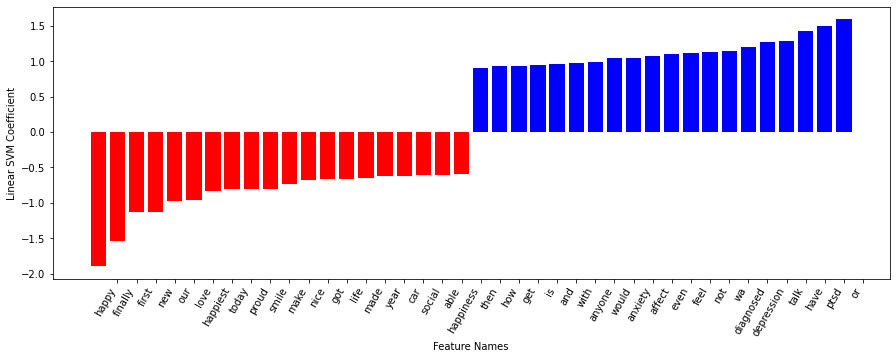

In [ ]:
#plotting top n features and their coefficients
plot_coefficients(SVM, Tfidf_vect.get_feature_names())

In [ ]:
#initializing tfidf vectorizer and an SVM classifier instance
tfidf = TfidfVectorizer()
clf = svm.SVC()

In [ ]:
#constructing the pipeline
pipe = Pipeline([
    ('tfidf', tfidf),
    ('clf', clf)
])

In [ ]:
linear_grid = {'tfidf__max_features': [500, 1000, 5000, None],
    'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)],
    'clf__C': np.logspace(-1, 3, 5),
    'clf__kernel' : ['linear']}
    
poly_grid = {'tfidf__max_features': [500, 1000, 5000, None],
    'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)],
    'clf__C': np.logspace(-1, 3, 5),
    'clf__kernel' : ['poly'],
    'clf__degree' : [2, 3],
    'clf__gamma': np.logspace(-2, 2, 5)}

rbf_grid = {'tfidf__max_features': [500, 1000, 5000, None],
    'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)],
    'clf__C': np.logspace(-1, 3, 5),
    'clf__kernel' : ['rbf'],
    'clf__gamma': np.logspace(-2, 2, 5)}

In [ ]:
scv_linear = RandomizedSearchCV(pipe, param_distributions = linear_grid, n_iter = 10, cv = 5, verbose = 2, n_jobs = -1, return_train_score = True, random_state = 42)
scv_linear.fit(X_trainLem, y_trainLem);

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    6.0s finished


In [ ]:
#using a randomized grid search to find the optimal value of the hyperparameters over a 5-fold cross-validation
scv_poly = RandomizedSearchCV(pipe, param_distributions = poly_grid, n_iter = 10, cv = 5, verbose = 2, n_jobs = -1, return_train_score = True, random_state = 42)
scv_poly.fit(X_trainLem, y_trainLem);

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   10.8s finished


In [ ]:
#using a randomized grid search to find the optimal value of the hyperparameters over a 5-fold cross-validation
scv_rbf = RandomizedSearchCV(pipe, param_distributions = rbf_grid, n_iter = 10, cv = 5, verbose = 2, n_jobs = -1, return_train_score = True, random_state = 42)
scv_rbf.fit(X_trainLem, y_trainLem);

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   11.6s finished


In [ ]:
#preview randomized gridsearch results
pd.DataFrame(scv_linear.cv_results_)[['params', 'mean_train_score', 'mean_test_score']]

,params,mean_train_score,mean_test_score
0,"{'tfidf__ngram_range': (1, 1), 'tfidf__max_fea...",0.929199,0.880440
1,"{'tfidf__ngram_range': (1, 3), 'tfidf__max_fea...",0.933624,0.878217
2,"{'tfidf__ngram_range': (1, 1), 'tfidf__max_fea...",1.000000,0.876068
3,"{'tfidf__ngram_range': (1, 1), 'tfidf__max_fea...",1.000000,0.909255
4,"{'tfidf__ngram_range': (1, 2), 'tfidf__max_fea...",0.981748,0.889353
5,"{'tfidf__ngram_range': (1, 1), 'tfidf__max_fea...",1.000000,0.909255
6,"{'tfidf__ngram_range': (1, 1), 'tfidf__max_fea...",1.000000,0.909255
7,"{'tfidf__ngram_range': (1, 1), 'tfidf__max_fea...",1.000000,0.876068
8,"{'tfidf__ngram_range': (1, 1), 'tfidf__max_fea...",0.986174,0.902564
9,"{'tfidf__ngram_range': (1, 1), 'tfidf__max_fea...",1.000000,0.909255


In [ ]:
pd.DataFrame(scv_poly.cv_results_)[['params', 'mean_train_score', 'mean_test_score']]

,params,mean_train_score,mean_test_score
0,"{'tfidf__ngram_range': (1, 3), 'tfidf__max_fea...",1.000000,0.862711
1,"{'tfidf__ngram_range': (1, 3), 'tfidf__max_fea...",1.000000,0.827326
2,"{'tfidf__ngram_range': (1, 2), 'tfidf__max_fea...",1.000000,0.864884
3,"{'tfidf__ngram_range': (1, 3), 'tfidf__max_fea...",0.800554,0.662247
4,"{'tfidf__ngram_range': (1, 2), 'tfidf__max_fea...",0.786742,0.617802
5,"{'tfidf__ngram_range': (1, 3), 'tfidf__max_fea...",1.000000,0.895971
6,"{'tfidf__ngram_range': (1, 2), 'tfidf__max_fea...",0.800554,0.702247
7,"{'tfidf__ngram_range': (1, 2), 'tfidf__max_fea...",1.000000,0.864884
8,"{'tfidf__ngram_range': (1, 1), 'tfidf__max_fea...",0.800554,0.617802
9,"{'tfidf__ngram_range': (1, 2), 'tfidf__max_fea...",1.000000,0.864884


In [ ]:
pd.DataFrame(scv_rbf.cv_results_)[['params', 'mean_train_score', 'mean_test_score']]

,params,mean_train_score,mean_test_score
0,"{'tfidf__ngram_range': (1, 3), 'tfidf__max_fea...",1.000000,0.853968
1,"{'tfidf__ngram_range': (1, 3), 'tfidf__max_fea...",1.000000,0.891526
2,"{'tfidf__ngram_range': (1, 3), 'tfidf__max_fea...",1.000000,0.895897
3,"{'tfidf__ngram_range': (1, 1), 'tfidf__max_fea...",0.740886,0.704469
4,"{'tfidf__ngram_range': (1, 3), 'tfidf__max_fea...",1.000000,0.500024
5,"{'tfidf__ngram_range': (1, 2), 'tfidf__max_fea...",1.000000,0.500024
6,"{'tfidf__ngram_range': (1, 2), 'tfidf__max_fea...",1.000000,0.882711
7,"{'tfidf__ngram_range': (1, 2), 'tfidf__max_fea...",1.000000,0.502247
8,"{'tfidf__ngram_range': (1, 3), 'tfidf__max_fea...",0.762985,0.717802
9,"{'tfidf__ngram_range': (1, 2), 'tfidf__max_fea...",1.000000,0.497802


In [ ]:
#preview the best parameters as found by the gridsearch
scv_linear.best_params_

{'clf__C': 100.0,
 'clf__kernel': 'linear',
 'tfidf__max_features': None,
 'tfidf__ngram_range': (1, 1)}

In [ ]:
#selecting the classifier with the hyperparameters yielding the highest average cross-validation score
best_clf = scv_linear.best_estimator_

best_clf

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 SVC(C=100.0, break_ties=False, cache_size=200,
                     class_weight=None, coef0=0.0,
                     decision_fu

evaluasi model

In [ ]:
# Use accuracy_score function to get the accuracy
print("SVM Training Accuracy Score -> ", best_clf.score(X_trainLem, y_trainLem)*100)
print("SVM Testing Accuracy Score -> ", best_clf.score(X_testLem, y_testLem)*100)

SVM Training Accuracy Score ->  100.0
SVM Testing Accuracy Score ->  94.84536082474226


In [ ]:
#obtaining predictions and decision function scores
Pred_YLem = best_clf.predict(X_testLem)
Score_YLem = best_clf.decision_function(X_testLem)

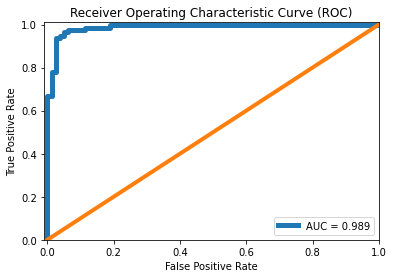

In [ ]:
#plotting the Receiver Operating Characteristic (ROC) Curve
false_pos_rate, true_pos_rate, thresholds = roc_curve(y_testLem, Score_YLem)
roc_auc = auc(false_pos_rate, true_pos_rate,)

plt.plot(false_pos_rate, true_pos_rate, linewidth=5, label='AUC = %0.3f'% roc_auc)
plt.plot([0,1],[0,1], linewidth=4)

plt.xlim([-0.01, 1])
plt.ylim([0, 1.01])
plt.legend(loc='lower right')
plt.title('Receiver Operating Characteristic Curve (ROC)')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

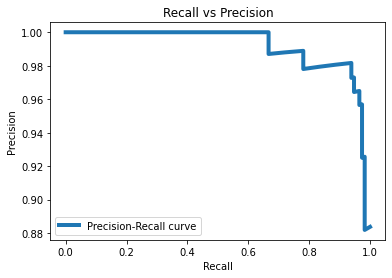

In [ ]:

#Plotting Precision versus Recall
precision_rate, recall_rate, threshold_rate = precision_recall_curve(y_testLem, Score_YLem)
plt.plot(recall_rate, precision_rate, linewidth=4, label='Precision-Recall curve')
plt.title('Recall vs Precision')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

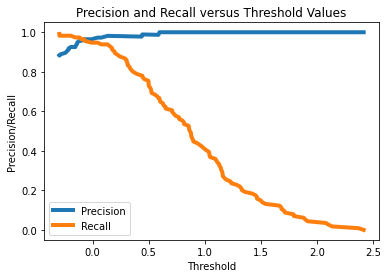

In [ ]:
#Plotting Precision and Recall for different Threshold values
plt.plot(threshold_rate, precision_rate[1:], label="Precision",linewidth=4)
plt.plot(threshold_rate, recall_rate[1:], label="Recall",linewidth=4)
plt.title('Precision and Recall versus Threshold Values')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')
plt.legend()
plt.show()

cponfusion matrix

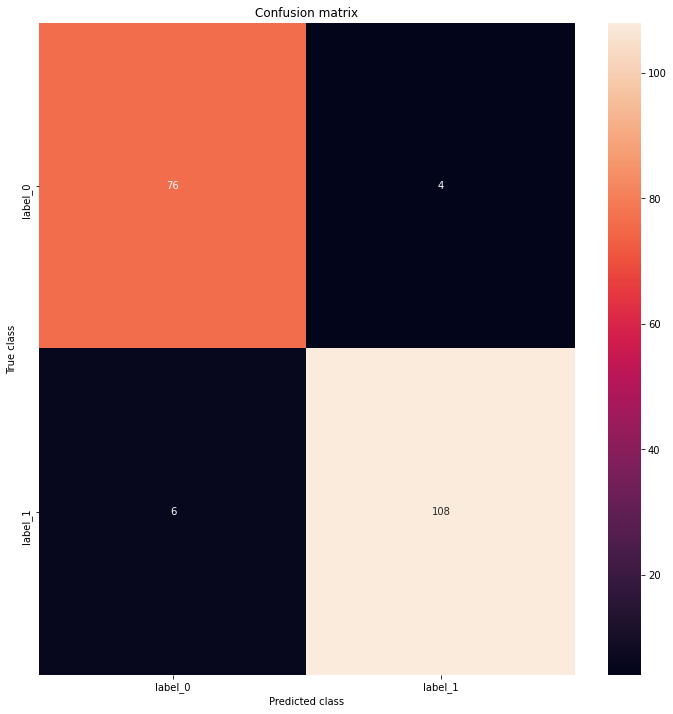

In [ ]:
#creating and displaying confusion matrix
LABELS = ['label_0', 'label_1']
conf_matrix = confusion_matrix(y_testLem, Pred_YLem)
plt.figure(figsize=(12, 12))
sb.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [ ]:
wrong_classifiedlem1 = Pred_YLem != y_testLem

In [ ]:
wrong_classifiedlem1

2      False
6      False
7      False
10     False
11     False
       ...  
627    False
633    False
641    False
642    False
644    False
Name: label, Length: 194, dtype: bool

In [ ]:
wrong_data = testdataLem[wrong_classified == True]
wrong_labels = Pred_YLem[wrong_classified == True]

In [ ]:
false_positivelem = wrong_data[wrong_labels == 1] 

In [ ]:
len(false_positivelem)

4

In [ ]:
false_positivelem

,text,label
65,am the only one allowed to wear a cap at work ...,0
311,my daily routine lately that ha worked wonder ...,0
558,for the first time ever i feel so free around ...,0
617,ive got my birthday party tonight with most of...,0


In [ ]:

false_negativestem = wrong_data[wrong_labels == 0]  

In [ ]:


len(false_negativestem)

6

In [ ]:
false_negativestem

,text,label
29,cat wa laying on my computer chair in my room ...,1
43,what can i do to make up for a friend after a ...,1
176,what is the worst side effect of medication tr...,1
506,ive been an adult my whole life i always had t...,1
516,a part of my maed program i get to work at the...,0
546,hi all so ive been depressed my whole life and...,1


In [ ]:
#generating and printing a classification report
print(classification_report(y_testLem, Pred_YLem))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94        80
           1       0.96      0.95      0.96       114

    accuracy                           0.95       194
   macro avg       0.95      0.95      0.95       194
weighted avg       0.95      0.95      0.95       194



In [ ]:

print("Accuracy score: ", accuracy_score(y_testLem,Pred_YLem))

Accuracy score:  0.9484536082474226


# DFLemmaPre1 + fitur seleksi

In [ ]:

from sklearn.feature_selection import SelectKBest, chi2


In [ ]:

chlem = SelectKBest(chi2)
clflem = svm.SVC()
# tfidf = TfidfVectorizer()

#constructing the pipeline
pipelem = Pipeline([
    # ('tfidf', tfidf),
    ('chi2', chlem),
    ('clf', clflem)
])

para = {"chi2__k" : np.arange(100, 2800, 250)}

estimatolem = GridSearchCV(pipelem,para)
estimatolem.fit(Train_XLem_Tfidf.toarray(), y_trainLem)



GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('chi2',
                                        SelectKBest(k=10,
                                                    score_func=<function chi2 at 0x7fe12e7010d0>)),
                                       ('clf',
                                        SVC(C=1.0, break_ties=False,
                                            cache_size=200, class_weight=None,
                                            coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='scale',
                                            kernel='rbf', max_iter=-1,
                                            probability=False,
                                            random_state=None, shrinking=True,
                                            tol=0.001, verbose=False))],
                              

In [ ]:

scorelem = estimatolem.best_score_
bestlem = estimatolem.best_params_

bestlem


{'chi2__k': 2600}

In [ ]:
print ("Select feature for training set via Chi2 ...")

chlem = SelectKBest(chi2, k=2600)


x_trainlem_feature_selected=chlem.fit_transform(Train_XLem_Tfidf, y_trainLem)
print ("Select feature for testset via Chi2 ...")
x_testlem_chi_selected = chlem.transform(Test_XLem_Tfidf)
print ("Finished")

Select feature for training set via Chi2 ...
Select feature for testset via Chi2 ...
Finished


In [ ]:
# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
SVMlem = svm.SVC(kernel = 'linear')
SVMlem.fit(x_trainlem_feature_selected, y_trainLem)


# Use accuracy_score function to get the accuracy
print("SVM Training Accuracy Score -> ", SVMlem.score(x_trainlem_feature_selected, y_trainLem)*100)
print("SVM Testing Accuracy Score -> ", SVMlem.score(x_testlem_chi_selected, y_testLem)*100)

SVM Training Accuracy Score ->  99.5575221238938
SVM Testing Accuracy Score ->  94.84536082474226


In [ ]:

chlem = SelectKBest(chi2, k=2600)
clflem = svm.SVC()
tfidflem = TfidfVectorizer()

pipelem = Pipeline([
    ('tfidf', tfidflem),
    ('chi2', chlem),
    ('clf', clflem)
])

In [ ]:

linear_grid = {'tfidf__max_features': [500, 1000, 5000, None],
    'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)],
    'clf__C': np.logspace(-1, 3, 5),
    'clf__kernel' : ['linear']}
    
poly_grid = {'tfidf__max_features': [500, 1000, 5000, None],
    'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)],
    'clf__C': np.logspace(-1, 3, 5),
    'clf__kernel' : ['poly'],
    'clf__degree' : [2, 3],
    'clf__gamma': np.logspace(-2, 2, 5)}

rbf_grid = {'tfidf__max_features': [500, 1000, 5000, None],
    'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)],
    'clf__C': np.logspace(-1, 3, 5),
    'clf__kernel' : ['rbf'],
    'clf__gamma': np.logspace(-2, 2, 5)}

In [ ]:
scv_linear = RandomizedSearchCV(pipelem, param_distributions = linear_grid, n_iter = 10, cv = 5, verbose = 2, n_jobs = -1, return_train_score = True, random_state = 42)
scv_linear.fit(X_trainLem, y_trainLem);

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  47 out of  50 | elapsed:    3.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    3.4s finished


In [ ]:

#using a randomized grid search to find the optimal value of the hyperparameters over a 5-fold cross-validation
scv_poly = RandomizedSearchCV(pipelem, param_distributions = poly_grid, n_iter = 10, cv = 5, verbose = 2, n_jobs = -1, return_train_score = True, random_state = 42)
scv_poly.fit(X_trainLem, y_trainLem);

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    6.4s finished


In [ ]:
#using a randomized grid search to find the optimal value of the hyperparameters over a 5-fold cross-validation
scv_rbf = RandomizedSearchCV(pipelem, param_distributions = rbf_grid, n_iter = 10, cv = 5, verbose = 2, n_jobs = -1, return_train_score = True, random_state = 42)
scv_rbf.fit(X_trainLem, y_trainLem);

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    7.3s finished


In [ ]:
#preview the best parameters as found by the gridsearch
scv_linear.best_params_

{'clf__C': 100.0,
 'clf__kernel': 'linear',
 'tfidf__max_features': None,
 'tfidf__ngram_range': (1, 1)}

In [ ]:
#selecting the classifier with the hyperparameters yielding the highest average cross-validation score
best_clfchilem = scv_linear.best_estimator_
best_clfchilem


Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='...
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('chi2',
                 SelectKBest(k=2600,
                             score_func=<function chi2 at 0x7fe12e7010d0>)),
                ('clf',
                 SVC(C=1

In [ ]:

# Use accuracy_score function to get the accuracy
print("SVM Training Accuracy Score with chi square for data raw-> ", best_clfchilem.score(X_trainLem, y_trainLem)*100)
print("SVM Testing Accuracy Score with chi square for data raw -> ", best_clfchilem.score(X_testLem, y_testLem)*100)



SVM Training Accuracy Score with chi square for data raw->  100.0
SVM Testing Accuracy Score with chi square for data raw ->  93.81443298969072


In [ ]:
#obtaining predictions and decision function scores
Predlem_Ychi = best_clfchilem.predict(X_testLem)
Scorelem_Ychi = best_clfchilem.decision_function(X_testLem)

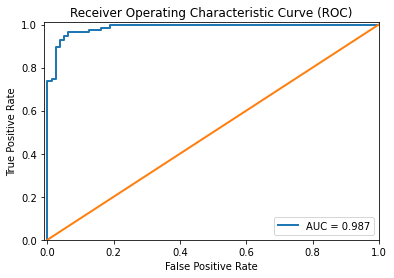

In [ ]:
#plotting the Receiver Operating Characteristic (ROC) Curve
false_pos_rate, true_pos_rate, thresholds = roc_curve(y_testLem, Scorelem_Ychi)
roc_auc = auc(false_pos_rate, true_pos_rate,)

plt.plot(false_pos_rate, true_pos_rate, linewidth=2, label='AUC = %0.3f'% roc_auc)
plt.plot([0,1],[0,1], linewidth=2)

plt.xlim([-0.01, 1])
plt.ylim([0, 1.01])
plt.legend(loc='lower right')
plt.title('Receiver Operating Characteristic Curve (ROC)')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

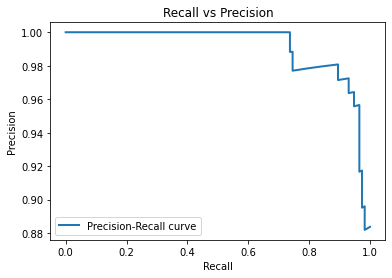

In [ ]:

#Plotting Precision versus Recall
precision_rate, recall_rate, threshold_rate = precision_recall_curve(y_testLem, Scorelem_Ychi)
plt.plot(recall_rate, precision_rate, linewidth=2, label='Precision-Recall curve')
plt.title('Recall vs Precision')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

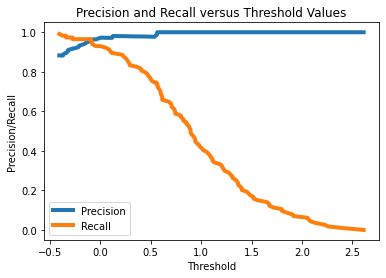

In [ ]:
#Plotting Precision and Recall for different Threshold values
plt.plot(threshold_rate, precision_rate[1:], label="Precision",linewidth=4)
plt.plot(threshold_rate, recall_rate[1:], label="Recall",linewidth=4)
plt.title('Precision and Recall versus Threshold Values')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')
plt.legend()
plt.show()

In [ ]:
#generating and printing a classification report
print(classification_report(y_testLem, Predlem_Ychi))

              precision    recall  f1-score   support

           0       0.90      0.95      0.93        80
           1       0.96      0.93      0.95       114

    accuracy                           0.94       194
   macro avg       0.93      0.94      0.94       194
weighted avg       0.94      0.94      0.94       194



In [ ]:

print("Accuracy score with chi square data Lemmatisasi Pre2: ", accuracy_score(y_testLem,Predlem_Ychi))

Accuracy score with chi square data Lemmatisasi Pre2:  0.9381443298969072


# DFPRE2

In [ ]:
!wget -O train_data2.csv https://raw.githubusercontent.com/godhi06/TA/master/data/traintesbaru/dfTrain_Pre2.csv
!wget -O test_data2.csv https://raw.githubusercontent.com/godhi06/TA/master/data/traintesbaru/dfTest_Pre2.csv

traindata2 = pd.read_csv('train_data2.csv', index_col=0) 
testdata2 = pd.read_csv('test_data2.csv', index_col=0) 

--2020-07-18 03:45:25--  https://raw.githubusercontent.com/godhi06/TA/master/data/traintesbaru/dfTrain_Pre2.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 93444 (91K) [text/plain]
Saving to: ‘train_data2.csv’

train_data2.csv     100%[===================>]  91.25K  --.-KB/s    in 0.03s   

2020-07-18 03:45:27 (2.92 MB/s) - ‘train_data2.csv’ saved [93444/93444]

--2020-07-18 03:45:28--  https://raw.githubusercontent.com/godhi06/TA/master/data/traintesbaru/dfTest_Pre2.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 39243 (38K) [text/

In [ ]:

# defining predictor and target features
X_trainpre2 = traindata2['text']
y_trainpre2 = traindata2['label']

X_testpre2 = testdata2['text']
y_testpre2 = testdata2['label']

In [ ]:
#encoding the corpus using Term Frequency - Inverse Document Frequency Encoding
Tfidf_vect = TfidfVectorizer()

In [ ]:

#fitting encoder on training data
Tfidf_vect.fit(X_trainpre2)


TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [ ]:

#Transforming the corpus for the training and testing data
Train_Xpre2_Tfidf = Tfidf_vect.transform(X_trainpre2)
Test_Xpre2_Tfidf = Tfidf_vect.transform(X_testpre2)




In [ ]:
#preview vocabulary vector
print(Tfidf_vect.vocabulary_)

{'major': 1838, 'depressive': 794, 'disorder': 853, 'many': 1855, 'years': 3445, 'got': 1316, 'point': 2266, 'sometime': 2795, 'last': 1726, 'year': 3443, 'energy': 992, 'ability': 2, 'practice': 2295, 'personal': 2205, 'hygiene': 1520, 'showering': 2701, 'daily': 728, 'brushing': 408, 'teeth': 3019, 'braces': 375, 'months': 1970, 'ago': 78, 'hopeless': 1477, 'caring': 467, 'never': 2028, 'used': 3252, 'brush': 405, 'due': 922, 'depression': 791, 'dawned': 745, 'upon': 3241, 'brushed': 406, 'long': 1802, 'time': 3097, 'like': 1781, 'least': 1746, 'week': 3345, 'probably': 2322, 'two': 3180, 'already': 95, 'aware': 233, 'kind': 1688, 'fucked': 1239, 'chance': 489, 'might': 1929, 'white': 3373, 'spots': 2836, 'get': 1279, 'one': 2092, 'friends': 1231, 'lost': 1814, 'brother': 400, 'suicide': 2945, 'still': 2884, 'completely': 603, 'dealt': 753, 'withgotten': 3394, 'hate': 1401, 'using': 3255, 'term': 3030, 'reference': 2452, 'someonesomething': 2793, 'died': 824, 'become': 274, 'signific

In [ ]:
#preview transformed training data
print(Train_Xpre2_Tfidf)

  (0, 3445)	0.06795827420667913
  (0, 3443)	0.06795827420667913
  (0, 3373)	0.11841757246021643
  (0, 3345)	0.08667612923102963
  (0, 3252)	0.08951935619604923
  (0, 3241)	0.14285253843466486
  (0, 3180)	0.08951935619604923
  (0, 3097)	0.06409570903067821
  (0, 3019)	0.5749450237611837
  (0, 2836)	0.13383431952100214
  (0, 2795)	0.14285253843466486
  (0, 2701)	0.14285253843466486
  (0, 2322)	0.20244108469436847
  (0, 2295)	0.12247270736324009
  (0, 2266)	0.09163921324166871
  (0, 2205)	0.13383431952100214
  (0, 2028)	0.074613934287352
  (0, 1970)	0.07567326137524823
  (0, 1929)	0.10493610325683492
  (0, 1855)	0.0927800614881385
  (0, 1838)	0.10122054234718424
  (0, 1802)	0.08758407833864507
  (0, 1781)	0.052161318493764326
  (0, 1746)	0.1070559603024544
  (0, 1726)	0.07678557637273582
  :	:
  (451, 2429)	0.12254178005210374
  (451, 2252)	0.2699953753783909
  (451, 1640)	0.1893762809950029
  (451, 1606)	0.1377248310698664
  (451, 1540)	0.1609115730221917
  (451, 1497)	0.1302177109633250

In [ ]:
# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
SVM = svm.SVC(kernel = 'linear')
SVM.fit(Train_Xpre2_Tfidf, y_trainpre2)

# Use accuracy_score function to get the accuracy
print("SVM Training Accuracy Score -> ", SVM.score(Train_Xpre2_Tfidf, y_trainpre2)*100)
print("SVM Testing Accuracy Score -> ", SVM.score(Test_Xpre2_Tfidf, y_testpre2)*100)

SVM Training Accuracy Score ->  100.0
SVM Testing Accuracy Score ->  94.3298969072165


In [ ]:
def plot_coefficients(classifier, feature_names, top_features=20):
    
    """This function visualizes the text features with the top n positive coefficients and the top n negative coefficients to
    gain insight as to what the strongest predictors of the target features are.
    
    classifier: an SVM classifier with a linear kernel
    feature_names: names of the features as provided by a TF-IDF embedder (accessed using the .get_feature_names attribute)
    top_features: the number of features with positive and negative coefficients to display, default value is 20
    """
    
    #converting coefficient matrix from sparse to dense and then unravelling it
    coef = np.ravel(classifier.coef_.reshape(-1, 1).todense())
    #getting the top n positive coefficients
    tpc = np.argsort(coef)[-top_features:]
    #getting the top n negative coefficients
    tnc = np.argsort(coef)[:top_features]
    #stacking them to form one array of top positive and negative coefficients
    top_coefficients = np.hstack([tnc, tpc])
    # creating plot
    plt.figure(figsize=(15, 5))
    #assigning color labels
    colors = ['red' if c < 0 else 'blue' for c in coef[top_coefficients]]
    #plotting data
    plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
    feature_names = np.array(feature_names)
    plt.xticks(np.arange(1, 1 + 2 * top_features), feature_names[top_coefficients], rotation=60, ha = 'right')
    plt.xlabel("Feature Names")
    plt.ylabel("Linear SVM Coefficient")
    plt.show()

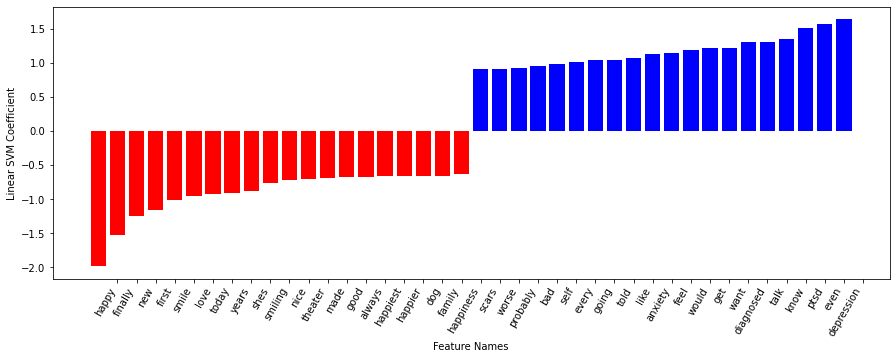

In [ ]:
#plotting top n features and their coefficients
plot_coefficients(SVM, Tfidf_vect.get_feature_names())

optimisasi model



In [ ]:
#initializing tfidf vectorizer and an SVM classifier instance
tfidf = TfidfVectorizer()
clf = svm.SVC()

In [ ]:
#constructing the pipeline
pipe = Pipeline([
    ('tfidf', tfidf),
    ('clf', clf)
])

In [ ]:

linear_grid = {'tfidf__max_features': [500, 1000, 5000, None],
    'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)],
    'clf__C': np.logspace(-1, 3, 5),
    'clf__kernel' : ['linear']}
    
poly_grid = {'tfidf__max_features': [500, 1000, 5000, None],
    'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)],
    'clf__C': np.logspace(-1, 3, 5),
    'clf__kernel' : ['poly'],
    'clf__degree' : [2, 3],
    'clf__gamma': np.logspace(-2, 2, 5)}

rbf_grid = {'tfidf__max_features': [500, 1000, 5000, None],
    'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)],
    'clf__C': np.logspace(-1, 3, 5),
    'clf__kernel' : ['rbf'],
    'clf__gamma': np.logspace(-2, 2, 5)}

In [ ]:
scv_linear = RandomizedSearchCV(pipe, param_distributions = linear_grid, n_iter = 10, cv = 5, verbose = 2, n_jobs = -1, return_train_score = True, random_state = 42)
scv_linear.fit(X_trainpre2, y_trainpre2);

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  47 out of  50 | elapsed:    3.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    3.6s finished


In [ ]:
#using a randomized grid search to find the optimal value of the hyperparameters over a 5-fold cross-validation
scv_poly = RandomizedSearchCV(pipe, param_distributions = poly_grid, n_iter = 10, cv = 5, verbose = 2, n_jobs = -1, return_train_score = True, random_state = 42)
scv_poly.fit(X_trainpre2, y_trainpre2);

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    6.0s finished


In [ ]:
#using a randomized grid search to find the optimal value of the hyperparameters over a 5-fold cross-validation
scv_rbf = RandomizedSearchCV(pipe, param_distributions = rbf_grid, n_iter = 10, cv = 5, verbose = 2, n_jobs = -1, return_train_score = True, random_state = 42)
scv_rbf.fit(X_trainpre2, y_trainpre2);

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    6.4s finished


In [ ]:
#preview randomized gridsearch results
pd.DataFrame(scv_linear.cv_results_)[['params', 'mean_train_score', 'mean_test_score']]

,params,mean_train_score,mean_test_score
0,"{'tfidf__ngram_range': (1, 1), 'tfidf__max_fea...",0.935264,0.878388
1,"{'tfidf__ngram_range': (1, 3), 'tfidf__max_fea...",0.932464,0.852063
2,"{'tfidf__ngram_range': (1, 1), 'tfidf__max_fea...",1.000000,0.871575
3,"{'tfidf__ngram_range': (1, 1), 'tfidf__max_fea...",1.000000,0.924737
4,"{'tfidf__ngram_range': (1, 2), 'tfidf__max_fea...",0.987278,0.878217
5,"{'tfidf__ngram_range': (1, 1), 'tfidf__max_fea...",1.000000,0.924737
6,"{'tfidf__ngram_range': (1, 1), 'tfidf__max_fea...",1.000000,0.924737
7,"{'tfidf__ngram_range': (1, 1), 'tfidf__max_fea...",1.000000,0.871575
8,"{'tfidf__ngram_range': (1, 1), 'tfidf__max_fea...",0.986169,0.884835
9,"{'tfidf__ngram_range': (1, 1), 'tfidf__max_fea...",1.000000,0.924737


In [ ]:
pd.DataFrame(scv_poly.cv_results_)[['params', 'mean_train_score', 'mean_test_score']]

,params,mean_train_score,mean_test_score
0,"{'tfidf__ngram_range': (1, 3), 'tfidf__max_fea...",1.000000,0.574774
1,"{'tfidf__ngram_range': (1, 3), 'tfidf__max_fea...",1.000000,0.882735
2,"{'tfidf__ngram_range': (1, 2), 'tfidf__max_fea...",1.000000,0.579170
3,"{'tfidf__ngram_range': (1, 3), 'tfidf__max_fea...",0.798897,0.571136
4,"{'tfidf__ngram_range': (1, 2), 'tfidf__max_fea...",0.796134,0.520024
5,"{'tfidf__ngram_range': (1, 3), 'tfidf__max_fea...",1.000000,0.913675
6,"{'tfidf__ngram_range': (1, 2), 'tfidf__max_fea...",0.800554,0.624469
7,"{'tfidf__ngram_range': (1, 2), 'tfidf__max_fea...",1.000000,0.579170
8,"{'tfidf__ngram_range': (1, 1), 'tfidf__max_fea...",0.800554,0.513358
9,"{'tfidf__ngram_range': (1, 2), 'tfidf__max_fea...",1.000000,0.579170


In [ ]:
pd.DataFrame(scv_rbf.cv_results_)[['params', 'mean_train_score', 'mean_test_score']]

,params,mean_train_score,mean_test_score
0,"{'tfidf__ngram_range': (1, 3), 'tfidf__max_fea...",1.000000,0.889328
1,"{'tfidf__ngram_range': (1, 3), 'tfidf__max_fea...",1.000000,0.893773
2,"{'tfidf__ngram_range': (1, 3), 'tfidf__max_fea...",1.000000,0.909231
3,"{'tfidf__ngram_range': (1, 1), 'tfidf__max_fea...",0.785637,0.728913
4,"{'tfidf__ngram_range': (1, 3), 'tfidf__max_fea...",1.000000,0.497802
5,"{'tfidf__ngram_range': (1, 2), 'tfidf__max_fea...",1.000000,0.500024
6,"{'tfidf__ngram_range': (1, 2), 'tfidf__max_fea...",1.000000,0.889304
7,"{'tfidf__ngram_range': (1, 2), 'tfidf__max_fea...",1.000000,0.506691
8,"{'tfidf__ngram_range': (1, 3), 'tfidf__max_fea...",0.781217,0.735580
9,"{'tfidf__ngram_range': (1, 2), 'tfidf__max_fea...",1.000000,0.497802


In [ ]:
#preview the best parameters as found by the gridsearch
scv_linear.best_params_

{'clf__C': 100.0,
 'clf__kernel': 'linear',
 'tfidf__max_features': None,
 'tfidf__ngram_range': (1, 1)}

In [ ]:
#selecting the classifier with the hyperparameters yielding the highest average cross-validation score
best_clf = scv_linear.best_estimator_

evaluasi model

In [ ]:
# Use accuracy_score function to get the accuracy
print("SVM Training Accuracy Score -> ", best_clf.score(X_trainpre2, y_trainpre2)*100)
print("SVM Testing Accuracy Score -> ", best_clf.score(X_testpre2, y_testpre2)*100)

SVM Training Accuracy Score ->  100.0
SVM Testing Accuracy Score ->  94.3298969072165


In [ ]:
#obtaining predictions and decision function scores
Pred_Ypre2 = best_clf.predict(X_testpre2)
Score_Ypre2 = best_clf.decision_function(X_testpre2)

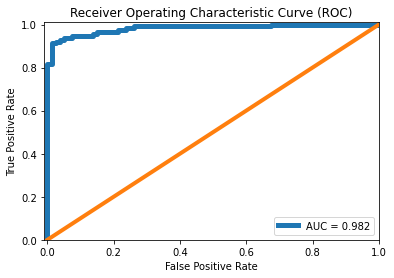

In [ ]:
#plotting the Receiver Operating Characteristic (ROC) Curve
false_pos_rate, true_pos_rate, thresholds = roc_curve(y_testpre2, Score_Ypre2)
roc_auc = auc(false_pos_rate, true_pos_rate,)

plt.plot(false_pos_rate, true_pos_rate, linewidth=5, label='AUC = %0.3f'% roc_auc)
plt.plot([0,1],[0,1], linewidth= 4)

plt.xlim([-0.01, 1])
plt.ylim([0, 1.01])
plt.legend(loc='lower right')
plt.title('Receiver Operating Characteristic Curve (ROC)')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

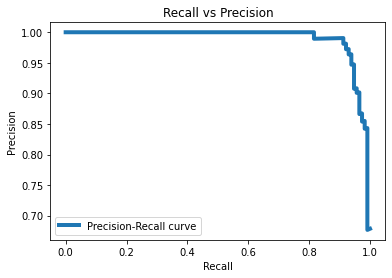

In [ ]:

#Plotting Precision versus Recall
precision_rate, recall_rate, threshold_rate = precision_recall_curve(y_testpre2, Score_Ypre2)
plt.plot(recall_rate, precision_rate, linewidth=4, label='Precision-Recall curve')
plt.title('Recall vs Precision')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

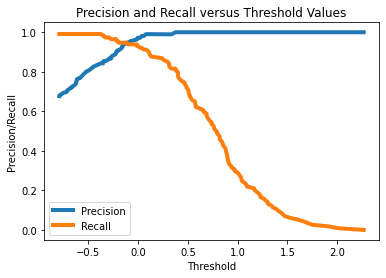

In [ ]:
#Plotting Precision and Recall for different Threshold values
plt.plot(threshold_rate, precision_rate[1:], label="Precision",linewidth=4)
plt.plot(threshold_rate, recall_rate[1:], label="Recall",linewidth=4)
plt.title('Precision and Recall versus Threshold Values')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')
plt.legend()
plt.show()

confusion matrix

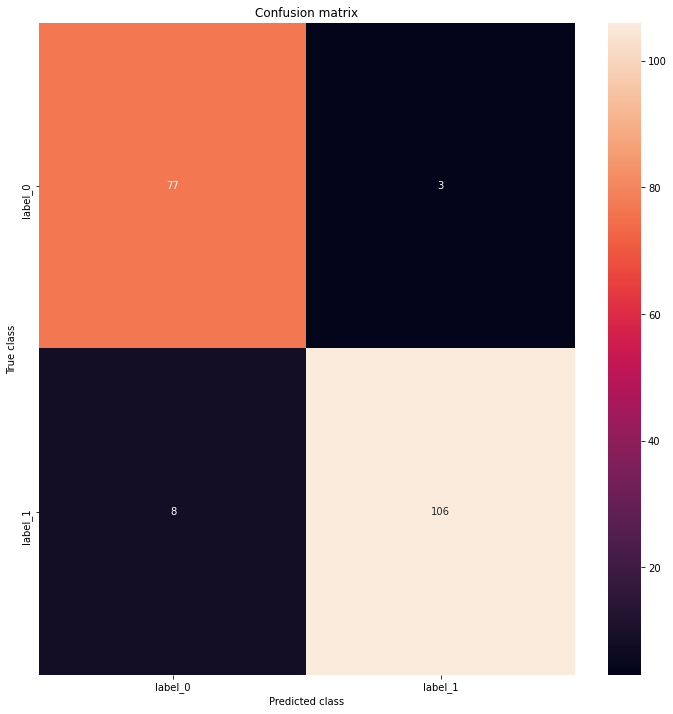

In [ ]:
#creating and displaying confusion matrix
LABELS = ['label_0', 'label_1']
conf_matrix = confusion_matrix(y_testpre2, Pred_Ypre2)
plt.figure(figsize=(12, 12))
sb.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [ ]:
wrong_classifiedpre2 = Pred_Ypre2 != y_testpre2

In [ ]:
wrong_classifiedpre2

2      False
6      False
7      False
10     False
11     False
       ...  
627    False
633    False
641     True
642    False
644    False
Name: label, Length: 194, dtype: bool

In [ ]:
wrong_data = testdata2[wrong_classifiedpre2 == True]
wrong_labels = Pred_Ypre2[wrong_classifiedpre2 == True]

In [ ]:

false_positivepre2 = wrong_data[wrong_labels == 1] 


In [ ]:

len(false_positivepre2)


3

In [ ]:
false_positivepre2

,text,label,wc_count
56,met year half ago college worked hour days mon...,0,19
311,daily routine lately worked wonders also repea...,0,41
558,first time ever feel free around every song re...,0,27


In [ ]:
false_negativepre2 = wrong_data[wrong_labels == 0]  

In [ ]:
len(false_negativepre2)


8

In [ ]:
false_negativepre2

,text,label,wc_count
29,cat laying computer chair room bed crying upse...,1,17
43,make friend asshole birthday days pleease heel...,1,12
63,since im kind scares work immensely though,1,7
321,absolutely nothing works depressed forever tru...,1,35
331,starters suicidal life meaning constantly thin...,1,35
479,dont know happy ive ridiculously incredible li...,1,39
506,ive adult whole life always survive feel littl...,1,29
641,wish could shake laugh joke life voice anymore...,1,22


In [ ]:
#generating and printing a classification report
print(classification_report(y_testpre2, Pred_Ypre2))

              precision    recall  f1-score   support

           0       0.91      0.96      0.93        80
           1       0.97      0.93      0.95       114

    accuracy                           0.94       194
   macro avg       0.94      0.95      0.94       194
weighted avg       0.95      0.94      0.94       194



In [ ]:

print("Accuracy score: ", accuracy_score(y_testpre2,Pred_Ypre2))

Accuracy score:  0.9432989690721649


# DFPRE2 + fitur seleksi

In [ ]:

from sklearn.feature_selection import SelectKBest, chi2


In [ ]:

ch = SelectKBest(chi2)
clf = svm.SVC()
# tfidf = TfidfVectorizer()

#constructing the pipeline
pipe = Pipeline([
    # ('tfidf', tfidf),
    ('chi2', ch),
    ('clf', clf)
])

para = {"chi2__k" : np.arange(310, 2900, 230)}

estimatorpre2 = GridSearchCV(pipe,para)
estimatorpre2.fit(Train_Xpre2_Tfidf.toarray(), y_trainpre2)

GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('chi2',
                                        SelectKBest(k=10,
                                                    score_func=<function chi2 at 0x7fe12e7010d0>)),
                                       ('clf',
                                        SVC(C=1.0, break_ties=False,
                                            cache_size=200, class_weight=None,
                                            coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='scale',
                                            kernel='rbf', max_iter=-1,
                                            probability=False,
                                            random_state=None, shrinking=True,
                                            tol=0.001, verbose=False))],
                              

In [ ]:

scorepre2 = estimatorpre2.best_score_
estimatorpre2.best_params_


{'chi2__k': 1690}

In [ ]:
print ("Select feature for training set via Chi2 ...")

ch = SelectKBest(chi2, k=1690)


x_trainpre2_feature_selected=ch.fit_transform(Train_Xpre2_Tfidf, y_trainpre2)
print ("Select feature for testset via Chi2 ...")
x_testpre2_chi_selected = ch.transform(Test_Xpre2_Tfidf)
print ("Finished")

Select feature for training set via Chi2 ...
Select feature for testset via Chi2 ...
Finished


In [ ]:
# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
SVM = svm.SVC(kernel = 'linear')
SVM.fit(x_trainpre2_feature_selected, y_trainpre2)


# Use accuracy_score function to get the accuracy
print("SVM Training Accuracy Score -> ", SVM.score(x_trainpre2_feature_selected, y_trainpre2)*100)
print("SVM Testing Accuracy Score -> ", SVM.score(x_testpre2_chi_selected, y_testpre2)*100)

SVM Training Accuracy Score ->  99.33628318584071
SVM Testing Accuracy Score ->  94.84536082474226


In [ ]:

chpre2 = SelectKBest(chi2, k=1690)
clfpre2 = svm.SVC()
tfidfpre2 = TfidfVectorizer()

pipepre2 = Pipeline([
    ('tfidf', tfidf),
    ('chi2', ch),
    ('clf', clf)
])

In [ ]:

linear_grid = {'tfidf__max_features': [500, 1000, 5000, None],
    'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)],
    'clf__C': np.logspace(-1, 3, 5),
    'clf__kernel' : ['linear']}
    
poly_grid = {'tfidf__max_features': [500, 1000, 5000, None],
    'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)],
    'clf__C': np.logspace(-1, 3, 5),
    'clf__kernel' : ['poly'],
    'clf__degree' : [2, 3],
    'clf__gamma': np.logspace(-2, 2, 5)}

rbf_grid = {'tfidf__max_features': [500, 1000, 5000, None],
    'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)],
    'clf__C': np.logspace(-1, 3, 5),
    'clf__kernel' : ['rbf'],
    'clf__gamma': np.logspace(-2, 2, 5)}

In [ ]:
scv_linear = RandomizedSearchCV(pipepre2, param_distributions = linear_grid, n_iter = 10, cv = 5, verbose = 2, n_jobs = -1, return_train_score = True, random_state = 42)
scv_linear.fit(X_trainpre2, y_trainpre2);

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.1s finished


In [ ]:
#using a randomized grid search to find the optimal value of the hyperparameters over a 5-fold cross-validation
scv_poly = RandomizedSearchCV(pipepre2, param_distributions = poly_grid, n_iter = 10, cv = 5, verbose = 2, n_jobs = -1, return_train_score = True, random_state = 42)
scv_poly.fit(X_trainpre2, y_trainpre2);

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    3.7s finished


In [ ]:
#using a randomized grid search to find the optimal value of the hyperparameters over a 5-fold cross-validation
scv_rbf = RandomizedSearchCV(pipepre2, param_distributions = rbf_grid, n_iter = 10, cv = 5, verbose = 2, n_jobs = -1, return_train_score = True, random_state = 42)
scv_rbf.fit(X_trainpre2, y_trainpre2);

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    4.2s finished


In [ ]:
#preview the best parameters as found by the gridsearch
scv_linear.best_params_

{'clf__C': 100.0,
 'clf__kernel': 'linear',
 'tfidf__max_features': None,
 'tfidf__ngram_range': (1, 1)}

In [ ]:
#selecting the classifier with the hyperparameters yielding the highest average cross-validation score
best_clfchipre2 = scv_linear.best_estimator_
best_clfchipre2


Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='...
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('chi2',
                 SelectKBest(k=1690,
                             score_func=<function chi2 at 0x7fe12e7010d0>)),
                ('clf',
                 SVC(C=1

In [ ]:

# Use accuracy_score function to get the accuracy
print("SVM Training Accuracy Score with chi square for data raw-> ", best_clfchipre2.score(X_trainpre2, y_trainpre2)*100)
print("SVM Testing Accuracy Score with chi square for data raw -> ", best_clfchipre2.score(X_testpre2, y_testpre2)*100)



SVM Training Accuracy Score with chi square for data raw->  100.0
SVM Testing Accuracy Score with chi square for data raw ->  94.84536082474226


# DFSTEMPRE2 

In [ ]:
!wget -O trainStempre2.csv https://raw.githubusercontent.com/godhi06/TA/master/data/traintesbaru/dfTrain_Pre2stem.csv
!wget -O testStempre2.csv https://raw.githubusercontent.com/godhi06/TA/master/data/traintesbaru/dfTest_Pre2stem.csv

traindataStempre2 = pd.read_csv('trainStempre2.csv', index_col=0) 
testdataStempre2 = pd.read_csv('testStempre2.csv', index_col=0) 

--2020-07-18 03:46:27--  https://raw.githubusercontent.com/godhi06/TA/master/data/traintesbaru/dfTrain_Pre2stem.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 81379 (79K) [text/plain]
Saving to: ‘trainStempre2.csv’

trainStempre2.csv   100%[===================>]  79.47K  --.-KB/s    in 0.03s   

2020-07-18 03:46:28 (2.58 MB/s) - ‘trainStempre2.csv’ saved [81379/81379]

--2020-07-18 03:46:30--  https://raw.githubusercontent.com/godhi06/TA/master/data/traintesbaru/dfTest_Pre2stem.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 34220 

In [ ]:
# defining predictor and target features
X_trainStempre2 = traindataStempre2['text']
y_trainStempre2 = traindataStempre2['label']

X_testStempre2 = testdataStempre2['text']
y_testStempre2 = testdataStempre2['label']

In [ ]:
#encoding the corpus using Term Frequency - Inverse Document Frequency Encoding
Tfidf_vect = TfidfVectorizer()

In [ ]:
#fitting encoder on training data
Tfidf_vect.fit(X_trainStempre2)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [ ]:

#Transforming the corpus for the training and testing data
Train_XStempre2_Tfidf = Tfidf_vect.transform(X_trainStempre2)
Test_XStempre2_Tfidf = Tfidf_vect.transform(X_testStempre2)

In [ ]:
#preview vocabulary vector
print(Tfidf_vect.vocabulary_)

{'major': 1394, 'depress': 607, 'disord': 653, 'mani': 1404, 'year': 2617, 'got': 999, 'point': 1715, 'sometim': 2122, 'last': 1313, 'energi': 757, 'abil': 1, 'practic': 1736, 'person': 1680, 'hygien': 1156, 'shower': 2044, 'daili': 562, 'brush': 313, 'teeth': 2288, 'brace': 287, 'month': 1496, 'ago': 50, 'hopeless': 1128, 'care': 360, 'never': 1541, 'use': 2471, 'due': 700, 'dawn': 573, 'upon': 2464, 'long': 1368, 'time': 2343, 'like': 1353, 'least': 1327, 'week': 2536, 'probabl': 1759, 'two': 2409, 'alreadi': 65, 'awar': 170, 'kind': 1283, 'fuck': 944, 'chanc': 376, 'might': 1464, 'white': 2560, 'spot': 2151, 'get': 972, 'one': 1593, 'friend': 936, 'lost': 1376, 'brother': 309, 'suicid': 2232, 'still': 2191, 'complet': 465, 'dealt': 579, 'withgotten': 2578, 'hate': 1067, 'term': 2296, 'refer': 1860, 'someonesometh': 2120, 'die': 631, 'becom': 205, 'significantli': 2058, 'increas': 1192, 'notic': 1565, 'told': 2352, 'day': 574, 'seriou': 2007, 'look': 1371, 'face': 820, 'tone': 2359, 

In [ ]:
#preview transformed training data
print(Train_XStempre2_Tfidf)

  (0, 2617)	0.10817782102783118
  (0, 2560)	0.11697177707953167
  (0, 2536)	0.07421991816319075
  (0, 2471)	0.07822554271746261
  (0, 2464)	0.1411084092830787
  (0, 2409)	0.08842638773722017
  (0, 2343)	0.059790399877119454
  (0, 2288)	0.5679253488748329
  (0, 2151)	0.12587988987484988
  (0, 2122)	0.09542285105839222
  (0, 2044)	0.12097740163380355
  (0, 1759)	0.1999694212492302
  (0, 1736)	0.12097740163380355
  (0, 1715)	0.09052036281734589
  (0, 1680)	0.08651473826307404
  (0, 1541)	0.0737029505601386
  (0, 1496)	0.07174876455880316
  (0, 1464)	0.10365490714544899
  (0, 1404)	0.09164728210808268
  (0, 1394)	0.09542285105839222
  (0, 1368)	0.08651473826307404
  (0, 1353)	0.05079206063289495
  (0, 1327)	0.10574888222557473
  (0, 1313)	0.07584807842106808
  (0, 1283)	0.08561787457629957
  :	:
  (451, 1842)	0.12540180551562816
  (451, 1702)	0.26438687247237236
  (451, 1247)	0.20144042274957133
  (451, 1224)	0.140949371101927
  (451, 1170)	0.17116238171212228
  (451, 1139)	0.1341577403813

In [ ]:
# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
SVM = svm.SVC(kernel = 'linear')
SVM.fit(Train_XStempre2_Tfidf, y_trainStempre2)

# Use accuracy_score function to get the accuracy
print("SVM Training Accuracy Score -> ", SVM.score(Train_XStempre2_Tfidf, y_trainStempre2)*100)
print("SVM Testing Accuracy Score -> ", SVM.score(Test_XStempre2_Tfidf, y_testStempre2)*100)

SVM Training Accuracy Score ->  100.0
SVM Testing Accuracy Score ->  94.84536082474226


In [ ]:
def plot_coefficients(classifier, feature_names, top_features=20):
    
    """This function visualizes the text features with the top n positive coefficients and the top n negative coefficients to
    gain insight as to what the strongest predictors of the target features are.
    
    classifier: an SVM classifier with a linear kernel
    feature_names: names of the features as provided by a TF-IDF embedder (accessed using the .get_feature_names attribute)
    top_features: the number of features with positive and negative coefficients to display, default value is 20
    """
    
    #converting coefficient matrix from sparse to dense and then unravelling it
    coef = np.ravel(classifier.coef_.reshape(-1, 1).todense())
    #getting the top n positive coefficients
    tpc = np.argsort(coef)[-top_features:]
    #getting the top n negative coefficients
    tnc = np.argsort(coef)[:top_features]
    #stacking them to form one array of top positive and negative coefficients
    top_coefficients = np.hstack([tnc, tpc])
    # creating plot
    plt.figure(figsize=(15, 5))
    #assigning color labels
    colors = ['red' if c < 0 else 'blue' for c in coef[top_coefficients]]
    #plotting data
    plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
    feature_names = np.array(feature_names)
    plt.xticks(np.arange(1, 1 + 2 * top_features), feature_names[top_coefficients], rotation=60, ha = 'right')
    plt.xlabel("Feature Names")
    plt.ylabel("Linear SVM Coefficient")
    plt.show()

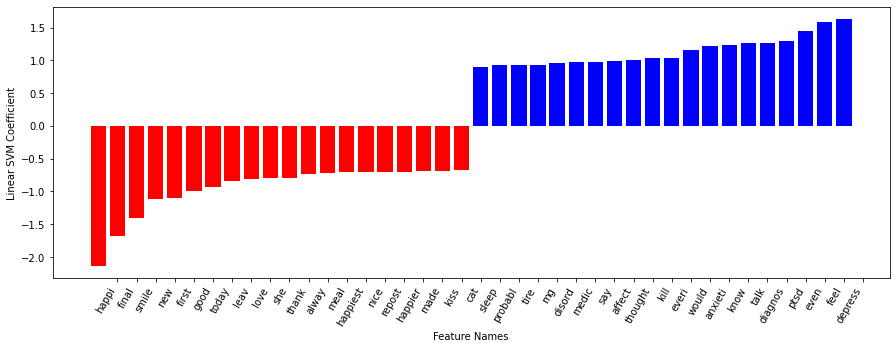

In [ ]:
#plotting top n features and their coefficients
plot_coefficients(SVM, Tfidf_vect.get_feature_names())

In [ ]:
#initializing tfidf vectorizer and an SVM classifier instance
tfidf = TfidfVectorizer()
clf = svm.SVC()

In [ ]:
#constructing the pipeline
pipe = Pipeline([
    ('tfidf', tfidf),
    ('clf', clf)
])

In [ ]:
linear_grid = {'tfidf__max_features': [500, 1000, 5000, None],
    'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)],
    'clf__C': np.logspace(-1, 3, 5),
    'clf__kernel' : ['linear']}
    
poly_grid = {'tfidf__max_features': [500, 1000, 5000, None],
    'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)],
    'clf__C': np.logspace(-1, 3, 5),
    'clf__kernel' : ['poly'],
    'clf__degree' : [2, 3],
    'clf__gamma': np.logspace(-2, 2, 5)}

rbf_grid = {'tfidf__max_features': [500, 1000, 5000, None],
    'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)],
    'clf__C': np.logspace(-1, 3, 5),
    'clf__kernel' : ['rbf'],
    'clf__gamma': np.logspace(-2, 2, 5)}

In [ ]:
scv_linear = RandomizedSearchCV(pipe, param_distributions = linear_grid, n_iter = 10, cv = 5, verbose = 2, n_jobs = -1, return_train_score = True, random_state = 42)
scv_linear.fit(X_trainStempre2, y_trainStempre2);

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    3.5s finished


In [ ]:
#using a randomized grid search to find the optimal value of the hyperparameters over a 5-fold cross-validation
scv_poly = RandomizedSearchCV(pipe, param_distributions = poly_grid, n_iter = 10, cv = 5, verbose = 2, n_jobs = -1, return_train_score = True, random_state = 42)
scv_poly.fit(X_trainStempre2, y_trainStempre2);

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    5.9s finished


In [ ]:
#using a randomized grid search to find the optimal value of the hyperparameters over a 5-fold cross-validation
scv_rbf = RandomizedSearchCV(pipe, param_distributions = rbf_grid, n_iter = 10, cv = 5, verbose = 2, n_jobs = -1, return_train_score = True, random_state = 42)
scv_rbf.fit(X_trainStempre2, y_trainStempre2);

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    6.4s finished


In [ ]:
#preview randomized gridsearch results
pd.DataFrame(scv_linear.cv_results_)[['params', 'mean_train_score', 'mean_test_score']]

,params,mean_train_score,mean_test_score
0,"{'tfidf__ngram_range': (1, 1), 'tfidf__max_fea...",0.959053,0.907009
1,"{'tfidf__ngram_range': (1, 3), 'tfidf__max_fea...",0.950180,0.876239
2,"{'tfidf__ngram_range': (1, 1), 'tfidf__max_fea...",1.000000,0.893602
3,"{'tfidf__ngram_range': (1, 1), 'tfidf__max_fea...",1.000000,0.915873
4,"{'tfidf__ngram_range': (1, 2), 'tfidf__max_fea...",0.990043,0.900317
5,"{'tfidf__ngram_range': (1, 1), 'tfidf__max_fea...",1.000000,0.915873
6,"{'tfidf__ngram_range': (1, 1), 'tfidf__max_fea...",1.000000,0.915873
7,"{'tfidf__ngram_range': (1, 1), 'tfidf__max_fea...",1.000000,0.893602
8,"{'tfidf__ngram_range': (1, 1), 'tfidf__max_fea...",0.991700,0.902515
9,"{'tfidf__ngram_range': (1, 1), 'tfidf__max_fea...",1.000000,0.915873


In [ ]:
pd.DataFrame(scv_poly.cv_results_)[['params', 'mean_train_score', 'mean_test_score']]

,params,mean_train_score,mean_test_score
0,"{'tfidf__ngram_range': (1, 3), 'tfidf__max_fea...",1.000000,0.895971
1,"{'tfidf__ngram_range': (1, 3), 'tfidf__max_fea...",1.000000,0.876068
2,"{'tfidf__ngram_range': (1, 2), 'tfidf__max_fea...",1.000000,0.813797
3,"{'tfidf__ngram_range': (1, 3), 'tfidf__max_fea...",0.800554,0.653358
4,"{'tfidf__ngram_range': (1, 2), 'tfidf__max_fea...",0.800554,0.631136
5,"{'tfidf__ngram_range': (1, 3), 'tfidf__max_fea...",1.000000,0.926960
6,"{'tfidf__ngram_range': (1, 2), 'tfidf__max_fea...",0.800554,0.677802
7,"{'tfidf__ngram_range': (1, 2), 'tfidf__max_fea...",1.000000,0.813797
8,"{'tfidf__ngram_range': (1, 1), 'tfidf__max_fea...",0.800554,0.593358
9,"{'tfidf__ngram_range': (1, 2), 'tfidf__max_fea...",1.000000,0.813797


In [ ]:
pd.DataFrame(scv_rbf.cv_results_)[['params', 'mean_train_score', 'mean_test_score']]

,params,mean_train_score,mean_test_score
0,"{'tfidf__ngram_range': (1, 3), 'tfidf__max_fea...",1.000000,0.891575
1,"{'tfidf__ngram_range': (1, 3), 'tfidf__max_fea...",1.000000,0.907009
2,"{'tfidf__ngram_range': (1, 3), 'tfidf__max_fea...",1.000000,0.907009
3,"{'tfidf__ngram_range': (1, 1), 'tfidf__max_fea...",0.774587,0.722247
4,"{'tfidf__ngram_range': (1, 3), 'tfidf__max_fea...",1.000000,0.497802
5,"{'tfidf__ngram_range': (1, 2), 'tfidf__max_fea...",1.000000,0.500024
6,"{'tfidf__ngram_range': (1, 2), 'tfidf__max_fea...",1.000000,0.902637
7,"{'tfidf__ngram_range': (1, 2), 'tfidf__max_fea...",1.000000,0.500024
8,"{'tfidf__ngram_range': (1, 3), 'tfidf__max_fea...",0.785637,0.735580
9,"{'tfidf__ngram_range': (1, 2), 'tfidf__max_fea...",1.000000,0.497802


In [ ]:
#preview the best parameters as found by the gridsearch
scv_linear.best_params_

{'clf__C': 100.0,
 'clf__kernel': 'linear',
 'tfidf__max_features': None,
 'tfidf__ngram_range': (1, 1)}

In [ ]:
#selecting the classifier with the hyperparameters yielding the highest average cross-validation score
best_clfpre2 = scv_linear.best_estimator_
best_clfpre2


Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 SVC(C=100.0, break_ties=False, cache_size=200,
                     class_weight=None, coef0=0.0,
                     decision_fu

evaluasi model


In [ ]:
# Use accuracy_score function to get the accuracy
print("SVM Training Accuracy Score -> ", best_clf.score(X_trainStempre2, y_trainStempre2)*100)
print("SVM Testing Accuracy Score -> ", best_clf.score(X_testStempre2, y_testStempre2)*100)

SVM Training Accuracy Score ->  98.45132743362832
SVM Testing Accuracy Score ->  90.20618556701031


In [ ]:
#obtaining predictions and decision function scores
Pred_YStempre2 = best_clfpre2.predict(X_testStempre2)
Score_YStempre2 = best_clfpre2.decision_function(X_testStempre2)

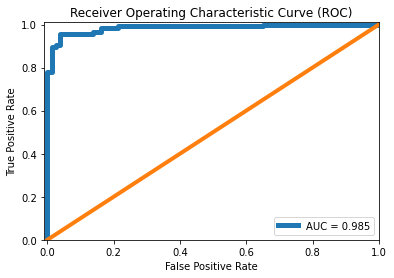

In [ ]:
#plotting the Receiver Operating Characteristic (ROC) Curve
false_pos_rate, true_pos_rate, thresholds = roc_curve(y_testStempre2, Score_YStempre2)
roc_auc = auc(false_pos_rate, true_pos_rate,)

plt.plot(false_pos_rate, true_pos_rate, linewidth=5, label='AUC = %0.3f'% roc_auc)
plt.plot([0,1],[0,1], linewidth=4)

plt.xlim([-0.01, 1])
plt.ylim([0, 1.01])
plt.legend(loc='lower right')
plt.title('Receiver Operating Characteristic Curve (ROC)')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

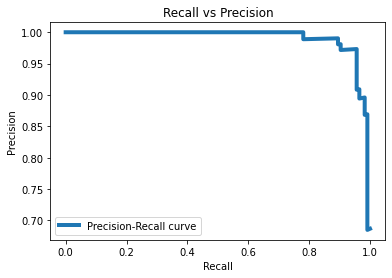

In [ ]:

#Plotting Precision versus Recall
precision_rate, recall_rate, threshold_rate = precision_recall_curve(y_testStempre2, Score_YStempre2)
plt.plot(recall_rate, precision_rate, linewidth=4, label='Precision-Recall curve')
plt.title('Recall vs Precision')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

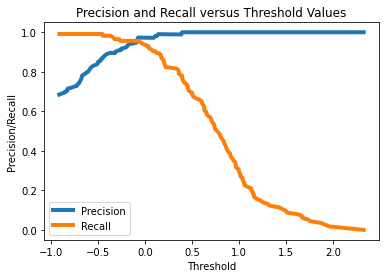

In [ ]:
#Plotting Precision and Recall for different Threshold values
plt.plot(threshold_rate, precision_rate[1:], label="Precision",linewidth=4)
plt.plot(threshold_rate, recall_rate[1:], label="Recall",linewidth=4)
plt.title('Precision and Recall versus Threshold Values')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')
plt.legend()
plt.show()

confusion matrix

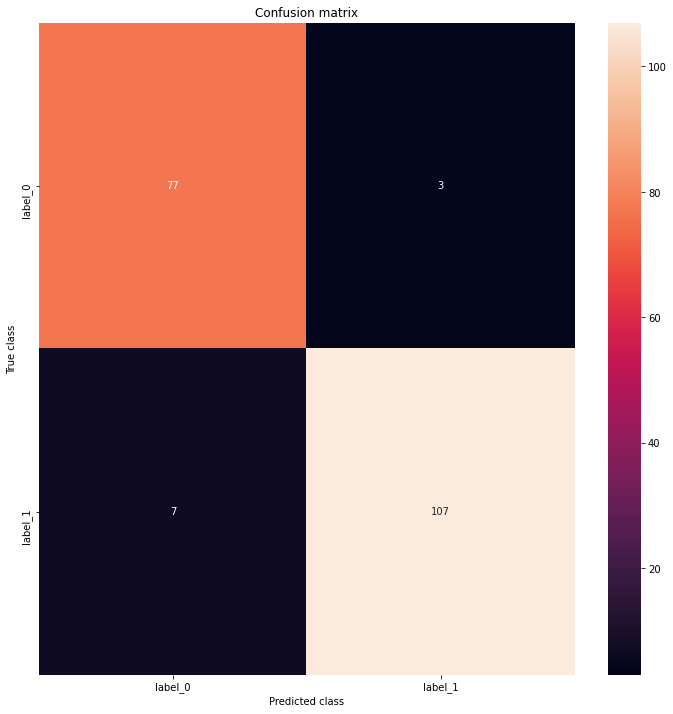

In [ ]:
#creating and displaying confusion matrix
LABELS = ['label_0', 'label_1']
conf_matrix = confusion_matrix(y_testStempre2, Pred_YStempre2)
plt.figure(figsize=(12, 12))
sb.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [ ]:
wrong_classified = Pred_YStempre2 != y_testStempre2

In [ ]:
wrong_classified

2      False
6      False
7      False
10     False
11     False
       ...  
627    False
633    False
641     True
642    False
644    False
Name: label, Length: 194, dtype: bool

In [ ]:
wrong_data = testdataStempre2[wrong_classified == True]
wrong_labels = Pred_YStempre2[wrong_classified == True]

In [ ]:

false_positivestempre2= wrong_data[wrong_labels == 1] 

In [ ]:
len(false_positivestempre2)

3

In [ ]:
false_positivestempre2

,text,label
311,daili routin late work wonder also repeat mant...,0
515,hurrican outsid window worri anyth citi housew...,0
617,ive got birthday parti tonight closest friend ...,0


In [ ]:

false_negativestempre2= wrong_data[wrong_labels == 0]  

In [ ]:

len(false_negativestempre2)

7

classification report

In [ ]:
#generating and printing a classification report
print(classification_report(y_testStempre2, Pred_YStempre2))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94        80
           1       0.97      0.94      0.96       114

    accuracy                           0.95       194
   macro avg       0.94      0.95      0.95       194
weighted avg       0.95      0.95      0.95       194



In [ ]:

print("Accuracy score: ", accuracy_score(y_testStempre2,Pred_YStempre2))

Accuracy score:  0.9484536082474226


# DFSTEMPRE2 + seleksi fitur

In [ ]:

from sklearn.feature_selection import SelectKBest, chi2


In [ ]:

chstempre2 = SelectKBest(chi2)
clfstempre2 = svm.SVC()
# tfidf = TfidfVectorizer()

#constructing the pipeline
pipestempre2 = Pipeline([
    # ('tfidf', tfidf),
    ('chi2', chstempre2),
    ('clf', clfstempre2)
])

para = {"chi2__k" : np.arange(50, 2500, 200)}

estimatostempre2 = GridSearchCV(pipestempre2,para)
estimatostempre2.fit(Train_XStempre2_Tfidf.toarray(), y_trainStempre2)



GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('chi2',
                                        SelectKBest(k=10,
                                                    score_func=<function chi2 at 0x7fe12e7010d0>)),
                                       ('clf',
                                        SVC(C=1.0, break_ties=False,
                                            cache_size=200, class_weight=None,
                                            coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='scale',
                                            kernel='rbf', max_iter=-1,
                                            probability=False,
                                            random_state=None, shrinking=True,
                                            tol=0.001, verbose=False))],
                              

In [ ]:

scorestempre2 = estimatostempre2.best_score_
beststempre2 = estimatostempre2.best_params_

beststempre2

{'chi2__k': 2250}

In [ ]:
scorestempre2

0.935873015873016

In [ ]:
print ("Select feature for training set via Chi2 ...")

chstempre2 = SelectKBest(chi2, k=2250)


x_trainstempre2_feature_selected=chstempre2.fit_transform(Train_XStempre2_Tfidf, y_trainStempre2)
print ("Select feature for testset via Chi2 ...")
x_teststempre2_chi_selected = chstempre2.transform(Test_XStempre2_Tfidf)
print ("Finished")

Select feature for training set via Chi2 ...
Select feature for testset via Chi2 ...
Finished


In [ ]:
# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
SVMstempre2 = svm.SVC(kernel = 'linear')
SVMstempre2.fit(x_trainstempre2_feature_selected, y_trainStempre2)


# Use accuracy_score function to get the accuracy
print("SVM Training Accuracy Score -> ", SVMstempre2.score(x_trainstempre2_feature_selected, y_trainStempre2)*100)
print("SVM Testing Accuracy Score -> ", SVMstempre2.score(x_teststempre2_chi_selected, y_testStempre2)*100)

SVM Training Accuracy Score ->  99.5575221238938
SVM Testing Accuracy Score ->  94.3298969072165


In [ ]:

chstempre2 = SelectKBest(chi2, k=2250)
clfstempre2 = svm.SVC()
tfidfstempre2 = TfidfVectorizer()

pipestempre2 = Pipeline([
    ('tfidf', tfidfstempre2),
    ('chi2', chstempre2),
    ('clf', clfstempre2)
])

In [ ]:

linear_grid = {'tfidf__max_features': [500, 1000, 5000, None],
    'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)],
    'clf__C': np.logspace(-1, 3, 5),
    'clf__kernel' : ['linear']}
    
poly_grid = {'tfidf__max_features': [500, 1000, 5000, None],
    'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)],
    'clf__C': np.logspace(-1, 3, 5),
    'clf__kernel' : ['poly'],
    'clf__degree' : [2, 3],
    'clf__gamma': np.logspace(-2, 2, 5)}

rbf_grid = {'tfidf__max_features': [500, 1000, 5000, None],
    'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)],
    'clf__C': np.logspace(-1, 3, 5),
    'clf__kernel' : ['rbf'],
    'clf__gamma': np.logspace(-2, 2, 5)}

In [ ]:
scv_linear = RandomizedSearchCV(pipestempre2, param_distributions = linear_grid, n_iter = 10, cv = 5, verbose = 2, n_jobs = -1, return_train_score = True, random_state = 42)
scv_linear.fit(X_trainStempre2, y_trainStempre2);

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.3s finished


In [ ]:
#using a randomized grid search to find the optimal value of the hyperparameters over a 5-fold cross-validation
scv_poly = RandomizedSearchCV(pipestempre2, param_distributions = poly_grid, n_iter = 10, cv = 5, verbose = 2, n_jobs = -1, return_train_score = True, random_state = 42)
scv_poly.fit(X_trainStempre2, y_trainStempre2);

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    3.6s finished


In [ ]:
#using a randomized grid search to find the optimal value of the hyperparameters over a 5-fold cross-validation
scv_rbf = RandomizedSearchCV(pipestempre2, param_distributions = rbf_grid, n_iter = 10, cv = 5, verbose = 2, n_jobs = -1, return_train_score = True, random_state = 42)
scv_rbf.fit(X_trainStempre2, y_trainStempre2);

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    4.2s finished


In [ ]:
#preview the best parameters as found by the gridsearch
scv_linear.best_params_

{'clf__C': 100.0,
 'clf__kernel': 'linear',
 'tfidf__max_features': None,
 'tfidf__ngram_range': (1, 1)}

In [ ]:
#selecting the classifier with the hyperparameters yielding the highest average cross-validation score
best_clfchistempre2 = scv_linear.best_estimator_
best_clfchistempre2


Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='...
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('chi2',
                 SelectKBest(k=2250,
                             score_func=<function chi2 at 0x7fe12e7010d0>)),
                ('clf',
                 SVC(C=1

In [ ]:

# Use accuracy_score function to get the accuracy
print("SVM Training Accuracy Score with chi square for data raw-> ", best_clfchistempre2.score(X_trainStempre2, y_trainStempre2)*100)
print("SVM Testing Accuracy Score with chi square for data raw -> ", best_clfchistempre2.score(X_testStempre2, y_testStempre2)*100)



SVM Training Accuracy Score with chi square for data raw->  100.0
SVM Testing Accuracy Score with chi square for data raw ->  94.3298969072165


In [ ]:
#obtaining predictions and decision function scores
Predstempre2_Ychi = best_clfchistempre2.predict(X_testStempre2)
Scorestempre2_Ychi = best_clfchistempre2.decision_function(X_testStempre2)

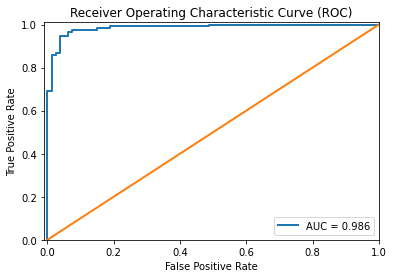

In [ ]:
#plotting the Receiver Operating Characteristic (ROC) Curve
false_pos_rate, true_pos_rate, thresholds = roc_curve(y_testStempre2, Scorestempre2_Ychi)
roc_auc = auc(false_pos_rate, true_pos_rate,)

plt.plot(false_pos_rate, true_pos_rate, linewidth=2, label='AUC = %0.3f'% roc_auc)
plt.plot([0,1],[0,1], linewidth=2)

plt.xlim([-0.01, 1])
plt.ylim([0, 1.01])
plt.legend(loc='lower right')
plt.title('Receiver Operating Characteristic Curve (ROC)')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

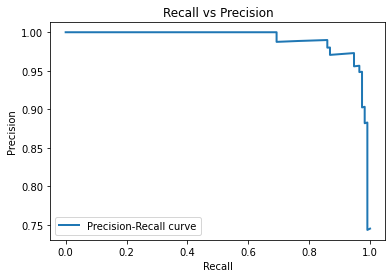

In [ ]:

#Plotting Precision versus Recall
precision_rate, recall_rate, threshold_rate = precision_recall_curve(y_testStempre2, Scorestempre2_Ychi)
plt.plot(recall_rate, precision_rate, linewidth=2, label='Precision-Recall curve')
plt.title('Recall vs Precision')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

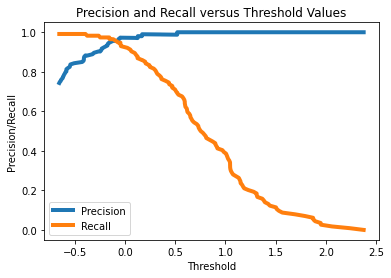

In [ ]:
#Plotting Precision and Recall for different Threshold values
plt.plot(threshold_rate, precision_rate[1:], label="Precision",linewidth=4)
plt.plot(threshold_rate, recall_rate[1:], label="Recall",linewidth=4)
plt.title('Precision and Recall versus Threshold Values')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')
plt.legend()
plt.show()

In [ ]:
#generating and printing a classification report
print(classification_report(y_testStempre2, Predstempre2_Ychi))

              precision    recall  f1-score   support

           0       0.91      0.96      0.93        80
           1       0.97      0.93      0.95       114

    accuracy                           0.94       194
   macro avg       0.94      0.95      0.94       194
weighted avg       0.95      0.94      0.94       194



In [ ]:

print("Accuracy score with chi square data raw: ", accuracy_score(y_testStempre2,Predstempre2_Ychi))

Accuracy score with chi square data raw:  0.9432989690721649


# DFLEMMAPRE2 

In [ ]:
!wget -O trainLempre2.csv https://raw.githubusercontent.com/godhi06/TA/master/data/traintesbaru/dfTrain_Pre2lem.csv
!wget -O testLempre2.csv https://raw.githubusercontent.com/godhi06/TA/master/data/traintesbaru/dfTest_Pre2lem.csv

traindataLempre2 = pd.read_csv('trainLempre2.csv', index_col=0) 
testdataLempre2 = pd.read_csv('testLempre2.csv', index_col=0) 

--2020-07-18 03:47:25--  https://raw.githubusercontent.com/godhi06/TA/master/data/traintesbaru/dfTrain_Pre2lem.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 90885 (89K) [text/plain]
Saving to: ‘trainLempre2.csv’

trainLempre2.csv    100%[===================>]  88.75K  --.-KB/s    in 0.03s   

2020-07-18 03:47:25 (2.75 MB/s) - ‘trainLempre2.csv’ saved [90885/90885]

--2020-07-18 03:47:27--  https://raw.githubusercontent.com/godhi06/TA/master/data/traintesbaru/dfTest_Pre2lem.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 38166 (37K

In [ ]:
# defining predictor and target features
X_trainLempre2 = traindataLempre2['text']
y_trainLempre2 = traindataLempre2['label']

X_testLempre2 = testdataLempre2['text']
y_testLempre2 = testdataLempre2['label']

In [ ]:
#encoding the corpus using Term Frequency - Inverse Document Frequency Encoding
Tfidf_vect = TfidfVectorizer()

In [ ]:
#fitting encoder on training data
Tfidf_vect.fit(X_trainLempre2)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [ ]:

#Transforming the corpus for the training and testing data
Train_XLempre2_Tfidf = Tfidf_vect.transform(X_trainLempre2)
Test_XLempre2_Tfidf = Tfidf_vect.transform(X_testLempre2)

In [ ]:
#preview vocabulary vector
print(Tfidf_vect.vocabulary_)

{'major': 1702, 'depressive': 734, 'disorder': 792, 'many': 1718, 'year': 3173, 'got': 1218, 'point': 2090, 'sometime': 2586, 'last': 1601, 'energy': 921, 'ability': 1, 'practice': 2118, 'personal': 2039, 'hygiene': 1409, 'showering': 2499, 'daily': 675, 'brushing': 377, 'teeth': 2787, 'brace': 347, 'month': 1823, 'ago': 70, 'hopeless': 1371, 'caring': 432, 'never': 1875, 'used': 2999, 'brush': 375, 'due': 855, 'depression': 732, 'dawned': 690, 'upon': 2991, 'brushed': 376, 'long': 1669, 'time': 2855, 'like': 1650, 'least': 1622, 'week': 3085, 'probably': 2144, 'two': 2930, 'already': 87, 'aware': 214, 'kind': 1568, 'fucked': 1151, 'chance': 452, 'might': 1787, 'white': 3110, 'spot': 2621, 'get': 1187, 'one': 1935, 'friend': 1141, 'lost': 1680, 'brother': 371, 'suicide': 2721, 'still': 2665, 'completely': 558, 'dealt': 697, 'withgotten': 3129, 'hate': 1298, 'using': 3002, 'term': 2797, 'reference': 2267, 'someonesomething': 2584, 'died': 764, 'become': 252, 'significantly': 2516, 'incr

In [ ]:
#preview transformed training data
print(Train_XLempre2_Tfidf)

  (0, 3173)	0.11006182289723669
  (0, 3110)	0.11900893261281634
  (0, 3085)	0.07551251643553533
  (0, 2999)	0.08996640285509576
  (0, 2991)	0.14356592325731343
  (0, 2930)	0.08996640285509576
  (0, 2855)	0.06083169673511418
  (0, 2787)	0.5778162156791078
  (0, 2621)	0.1280721872015243
  (0, 2586)	0.14356592325731343
  (0, 2499)	0.14356592325731343
  (0, 2144)	0.20345204605973147
  (0, 2118)	0.12308431827039647
  (0, 2090)	0.09209684615881818
  (0, 2039)	0.13450266866860547
  (0, 1875)	0.07498654543491687
  (0, 1823)	0.07299832574678038
  (0, 1787)	0.1054601389108849
  (0, 1718)	0.093243391635683
  (0, 1702)	0.10172602302986573
  (0, 1669)	0.08802146050123806
  (0, 1650)	0.05223317273564286
  (0, 1622)	0.10759058221460732
  (0, 1601)	0.07716903238536864
  (0, 1568)	0.08710897722769034
  :	:
  (451, 2245)	0.12209559870169494
  (451, 2077)	0.27618512311945653
  (451, 1524)	0.1937178050150252
  (451, 1491)	0.14088222575045534
  (451, 1426)	0.1646005326728137
  (451, 1389)	0.129014537587440

In [ ]:
# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
SVM = svm.SVC(kernel = 'linear')
SVM.fit(Train_XLempre2_Tfidf, y_trainLempre2)

# Use accuracy_score function to get the accuracy
print("SVM Training Accuracy Score -> ", SVM.score(Train_XLempre2_Tfidf, y_trainLempre2)*100)
print("SVM Testing Accuracy Score -> ", SVM.score(Test_XLempre2_Tfidf, y_testLempre2)*100)

SVM Training Accuracy Score ->  100.0
SVM Testing Accuracy Score ->  94.84536082474226


In [ ]:
def plot_coefficients(classifier, feature_names, top_features=20):
    
    """This function visualizes the text features with the top n positive coefficients and the top n negative coefficients to
    gain insight as to what the strongest predictors of the target features are.
    
    classifier: an SVM classifier with a linear kernel
    feature_names: names of the features as provided by a TF-IDF embedder (accessed using the .get_feature_names attribute)
    top_features: the number of features with positive and negative coefficients to display, default value is 20
    """
    
    #converting coefficient matrix from sparse to dense and then unravelling it
    coef = np.ravel(classifier.coef_.reshape(-1, 1).todense())
    #getting the top n positive coefficients
    tpc = np.argsort(coef)[-top_features:]
    #getting the top n negative coefficients
    tnc = np.argsort(coef)[:top_features]
    #stacking them to form one array of top positive and negative coefficients
    top_coefficients = np.hstack([tnc, tpc])
    # creating plot
    plt.figure(figsize=(15, 5))
    #assigning color labels
    colors = ['red' if c < 0 else 'blue' for c in coef[top_coefficients]]
    #plotting data
    plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
    feature_names = np.array(feature_names)
    plt.xticks(np.arange(1, 1 + 2 * top_features), feature_names[top_coefficients], rotation=60, ha = 'right')
    plt.xlabel("Feature Names")
    plt.ylabel("Linear SVM Coefficient")
    plt.show()

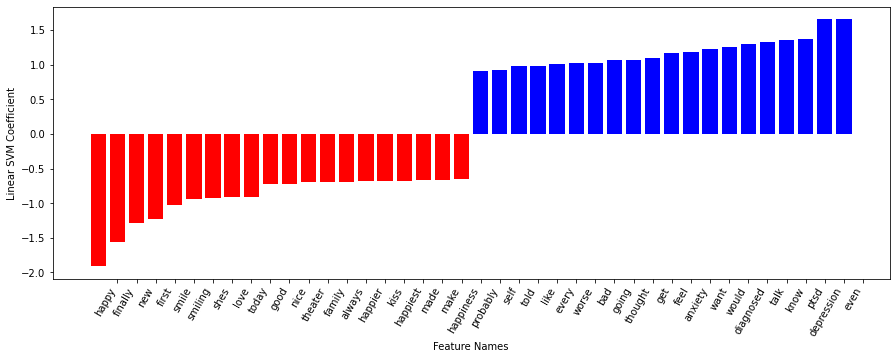

In [ ]:
#plotting top n features and their coefficients
plot_coefficients(SVM, Tfidf_vect.get_feature_names())

In [ ]:
#initializing tfidf vectorizer and an SVM classifier instance
tfidf = TfidfVectorizer()
clf = svm.SVC()

In [ ]:
#constructing the pipeline
pipe = Pipeline([
    ('tfidf', tfidf),
    ('clf', clf)
])

In [ ]:
linear_grid = {'tfidf__max_features': [500, 1000, 5000, None],
    'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)],
    'clf__C': np.logspace(-1, 3, 5),
    'clf__kernel' : ['linear']}
    
poly_grid = {'tfidf__max_features': [500, 1000, 5000, None],
    'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)],
    'clf__C': np.logspace(-1, 3, 5),
    'clf__kernel' : ['poly'],
    'clf__degree' : [2, 3],
    'clf__gamma': np.logspace(-2, 2, 5)}

rbf_grid = {'tfidf__max_features': [500, 1000, 5000, None],
    'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)],
    'clf__C': np.logspace(-1, 3, 5),
    'clf__kernel' : ['rbf'],
    'clf__gamma': np.logspace(-2, 2, 5)}

In [ ]:
scv_linear = RandomizedSearchCV(pipe, param_distributions = linear_grid, n_iter = 10, cv = 5, verbose = 2, n_jobs = -1, return_train_score = True, random_state = 42)
scv_linear.fit(X_trainLempre2, y_trainLempre2);

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  47 out of  50 | elapsed:    3.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    3.6s finished


In [ ]:
#using a randomized grid search to find the optimal value of the hyperparameters over a 5-fold cross-validation
scv_poly = RandomizedSearchCV(pipe, param_distributions = poly_grid, n_iter = 10, cv = 5, verbose = 2, n_jobs = -1, return_train_score = True, random_state = 42)
scv_poly.fit(X_trainLempre2, y_trainLempre2);

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    5.9s finished


In [ ]:
#using a randomized grid search to find the optimal value of the hyperparameters over a 5-fold cross-validation
scv_rbf = RandomizedSearchCV(pipe, param_distributions = rbf_grid, n_iter = 10, cv = 5, verbose = 2, n_jobs = -1, return_train_score = True, random_state = 42)
scv_rbf.fit(X_trainLempre2, y_trainLempre2);

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    6.4s finished


In [ ]:
#preview randomized gridsearch results
pd.DataFrame(scv_linear.cv_results_)[['params', 'mean_train_score', 'mean_test_score']]

,params,mean_train_score,mean_test_score
0,"{'tfidf__ngram_range': (1, 1), 'tfidf__max_fea...",0.940789,0.871770
1,"{'tfidf__ngram_range': (1, 3), 'tfidf__max_fea...",0.932462,0.852015
2,"{'tfidf__ngram_range': (1, 1), 'tfidf__max_fea...",1.000000,0.873773
3,"{'tfidf__ngram_range': (1, 1), 'tfidf__max_fea...",1.000000,0.922515
4,"{'tfidf__ngram_range': (1, 2), 'tfidf__max_fea...",0.987281,0.880415
5,"{'tfidf__ngram_range': (1, 1), 'tfidf__max_fea...",1.000000,0.922515
6,"{'tfidf__ngram_range': (1, 1), 'tfidf__max_fea...",1.000000,0.922515
7,"{'tfidf__ngram_range': (1, 1), 'tfidf__max_fea...",1.000000,0.873773
8,"{'tfidf__ngram_range': (1, 1), 'tfidf__max_fea...",0.989491,0.884860
9,"{'tfidf__ngram_range': (1, 1), 'tfidf__max_fea...",1.000000,0.922515


In [ ]:
pd.DataFrame(scv_poly.cv_results_)[['params', 'mean_train_score', 'mean_test_score']]

,params,mean_train_score,mean_test_score
0,"{'tfidf__ngram_range': (1, 3), 'tfidf__max_fea...",1.000000,0.579170
1,"{'tfidf__ngram_range': (1, 3), 'tfidf__max_fea...",1.000000,0.889328
2,"{'tfidf__ngram_range': (1, 2), 'tfidf__max_fea...",1.000000,0.579170
3,"{'tfidf__ngram_range': (1, 3), 'tfidf__max_fea...",0.798897,0.573358
4,"{'tfidf__ngram_range': (1, 2), 'tfidf__max_fea...",0.797792,0.524469
5,"{'tfidf__ngram_range': (1, 3), 'tfidf__max_fea...",1.000000,0.913651
6,"{'tfidf__ngram_range': (1, 2), 'tfidf__max_fea...",0.800554,0.620024
7,"{'tfidf__ngram_range': (1, 2), 'tfidf__max_fea...",1.000000,0.579170
8,"{'tfidf__ngram_range': (1, 1), 'tfidf__max_fea...",0.800554,0.524469
9,"{'tfidf__ngram_range': (1, 2), 'tfidf__max_fea...",1.000000,0.579170


In [ ]:
pd.DataFrame(scv_rbf.cv_results_)[['params', 'mean_train_score', 'mean_test_score']]

,params,mean_train_score,mean_test_score
0,"{'tfidf__ngram_range': (1, 3), 'tfidf__max_fea...",1.000000,0.891600
1,"{'tfidf__ngram_range': (1, 3), 'tfidf__max_fea...",1.000000,0.882711
2,"{'tfidf__ngram_range': (1, 3), 'tfidf__max_fea...",1.000000,0.913626
3,"{'tfidf__ngram_range': (1, 1), 'tfidf__max_fea...",0.775692,0.724469
4,"{'tfidf__ngram_range': (1, 3), 'tfidf__max_fea...",1.000000,0.497802
5,"{'tfidf__ngram_range': (1, 2), 'tfidf__max_fea...",1.000000,0.500024
6,"{'tfidf__ngram_range': (1, 2), 'tfidf__max_fea...",1.000000,0.909182
7,"{'tfidf__ngram_range': (1, 2), 'tfidf__max_fea...",1.000000,0.504469
8,"{'tfidf__ngram_range': (1, 3), 'tfidf__max_fea...",0.781769,0.731136
9,"{'tfidf__ngram_range': (1, 2), 'tfidf__max_fea...",1.000000,0.497802


In [ ]:
#preview the best parameters as found by the gridsearch
scv_linear.best_params_

{'clf__C': 100.0,
 'clf__kernel': 'linear',
 'tfidf__max_features': None,
 'tfidf__ngram_range': (1, 1)}

In [ ]:
#selecting the classifier with the hyperparameters yielding the highest average cross-validation score
best_clf = scv_linear.best_estimator_

best_clf

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 SVC(C=100.0, break_ties=False, cache_size=200,
                     class_weight=None, coef0=0.0,
                     decision_fu

evaluasi model

In [ ]:
# Use accuracy_score function to get the accuracy
print("SVM Training Accuracy Score -> ", best_clf.score(X_trainLempre2, y_trainLempre2)*100)
print("SVM Testing Accuracy Score -> ", best_clf.score(X_testLempre2, y_testLempre2)*100)

SVM Training Accuracy Score ->  100.0
SVM Testing Accuracy Score ->  95.36082474226805


In [ ]:
#obtaining predictions and decision function scores
Pred_YLempre2 = best_clf.predict(X_testLempre2)
Score_YLempre2 = best_clf.decision_function(X_testLempre2)

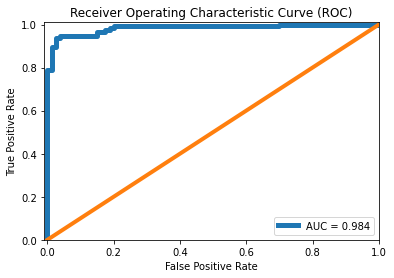

In [ ]:
#plotting the Receiver Operating Characteristic (ROC) Curve
false_pos_rate, true_pos_rate, thresholds = roc_curve(y_testLempre2, Score_YLempre2)
roc_auc = auc(false_pos_rate, true_pos_rate,)

plt.plot(false_pos_rate, true_pos_rate, linewidth=5, label='AUC = %0.3f'% roc_auc)
plt.plot([0,1],[0,1], linewidth=4)

plt.xlim([-0.01, 1])
plt.ylim([0, 1.01])
plt.legend(loc='lower right')
plt.title('Receiver Operating Characteristic Curve (ROC)')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

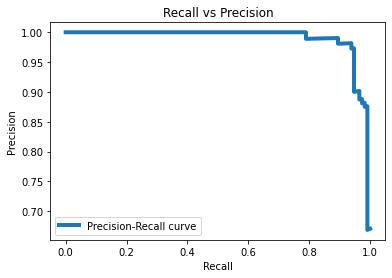

In [ ]:

#Plotting Precision versus Recall
precision_rate, recall_rate, threshold_rate = precision_recall_curve(y_testLempre2, Score_YLempre2)
plt.plot(recall_rate, precision_rate, linewidth=4, label='Precision-Recall curve')
plt.title('Recall vs Precision')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

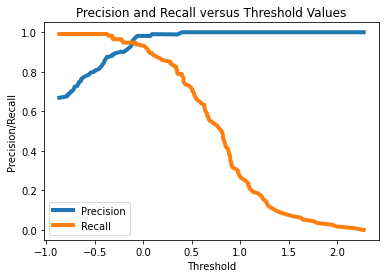

In [ ]:
#Plotting Precision and Recall for different Threshold values
plt.plot(threshold_rate, precision_rate[1:], label="Precision",linewidth=4)
plt.plot(threshold_rate, recall_rate[1:], label="Recall",linewidth=4)
plt.title('Precision and Recall versus Threshold Values')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')
plt.legend()
plt.show()

confusion matrix

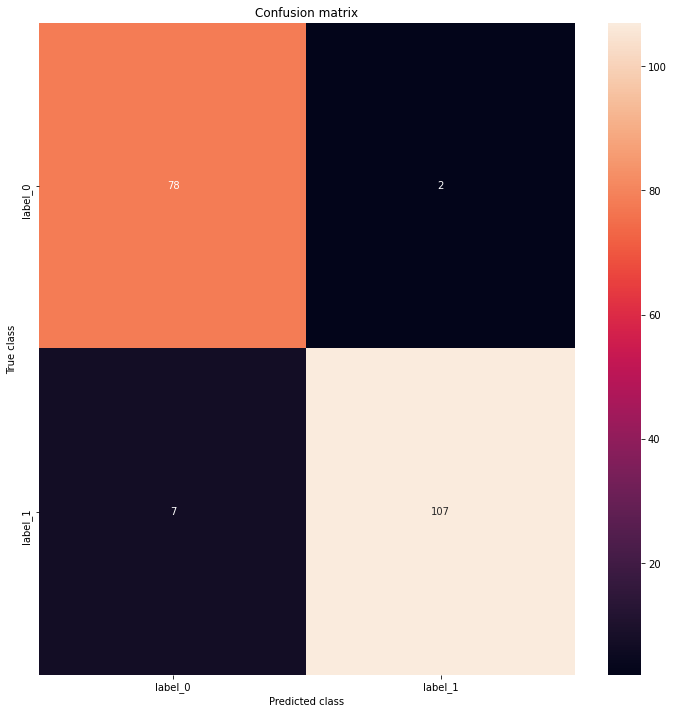

In [ ]:
#creating and displaying confusion matrix
LABELS = ['label_0', 'label_1']
conf_matrix = confusion_matrix(y_testLempre2, Pred_YLempre2)
plt.figure(figsize=(12, 12))
sb.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [ ]:
wrong_classified = Pred_YLempre2 != y_testLempre2

In [ ]:
wrong_classified

2      False
6      False
7      False
10     False
11     False
       ...  
627    False
633    False
641     True
642    False
644    False
Name: label, Length: 194, dtype: bool

In [ ]:
wrong_data = testdataLempre2[wrong_classified == True]
wrong_labels = Pred_YLempre2[wrong_classified == True]

In [ ]:
false_positivelempre2 = wrong_data[wrong_labels == 1] 


In [ ]:
len(false_positivelempre2)

2

In [ ]:
false_positivelempre2

,text,label
311,daily routine lately worked wonder also repeat...,0
617,ive got birthday party tonight closest friend ...,0


In [ ]:
false_negativelempre2 = wrong_data[wrong_labels == 0]  

In [ ]:
len(false_negativelempre2)


7

In [ ]:
false_negativelempre2

,text,label
29,cat laying computer chair room bed cry upset w...,1
43,make friend asshole birthday day pleease heelp...,1
63,since im kind scare work immensely though,1
331,starter suicidal life meaning constantly think...,1
479,dont know happy ive ridiculously incredible li...,1
506,ive adult whole life always survive feel littl...,1
641,wish could shake laugh joke life voice anymore...,1


In [ ]:
#generating and printing a classification report
print(classification_report(y_testLempre2, Pred_YLempre2))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95        80
           1       0.98      0.94      0.96       114

    accuracy                           0.95       194
   macro avg       0.95      0.96      0.95       194
weighted avg       0.96      0.95      0.95       194



In [ ]:

print("Accuracy score: ", accuracy_score(y_testStempre2,Pred_YLempre2))

Accuracy score:  0.9536082474226805


# DFLEMMAPRE2 + seleksi fitur


In [ ]:

from sklearn.feature_selection import SelectKBest, chi2


In [ ]:

chlempre2 = SelectKBest(chi2, k='all')
clflempre2 = svm.SVC()
# tfidf = TfidfVectorizer()

#constructing the pipeline
pipelempre2 = Pipeline([
    # ('tfidf', tfidf),
    ('chi2', chlempre2),
    ('clf', clflempre2)
])

para = {"chi2__k" : np.arange(50, 2800, 200)}

estimatolempre2 = GridSearchCV(pipelempre2,para)
estimatolempre2.fit(Train_XLempre2_Tfidf.toarray(), y_trainLempre2)



GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('chi2',
                                        SelectKBest(k='all',
                                                    score_func=<function chi2 at 0x7fe12e7010d0>)),
                                       ('clf',
                                        SVC(C=1.0, break_ties=False,
                                            cache_size=200, class_weight=None,
                                            coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='scale',
                                            kernel='rbf', max_iter=-1,
                                            probability=False,
                                            random_state=None, shrinking=True,
                                            tol=0.001, verbose=False))],
                           

In [ ]:

scorelempre2 = estimatolempre2.best_score_
bestlempre2 = estimatolempre2.best_params_

bestlempre2

{'chi2__k': 1250}

In [ ]:
print ("Select feature for training set via Chi2 ...")

chlempre2 = SelectKBest(chi2, k=1250)


x_trainlempre2_feature_selected=chlempre2.fit_transform(Train_XLempre2_Tfidf, y_trainLempre2)
print ("Select feature for testset via Chi2 ...")
x_testlempre2_chi_selected = chlempre2.transform(Test_XLempre2_Tfidf)
print ("Finished")

Select feature for training set via Chi2 ...
Select feature for testset via Chi2 ...
Finished


In [ ]:
# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
SVMlempre2  = svm.SVC(kernel = 'linear')
SVMlempre2.fit(x_trainlempre2_feature_selected, y_trainLempre2)

# Use accuracy_score function to get the accuracy
print("SVM Training Accuracy Score -> ", SVMlempre2.score(x_trainlempre2_feature_selected, y_trainLempre2)*100)
print("SVM Testing Accuracy Score -> ", SVMlempre2.score(x_testlempre2_chi_selected, y_testLempre2)*100)

SVM Training Accuracy Score ->  99.33628318584071
SVM Testing Accuracy Score ->  96.90721649484536


In [ ]:

chlempre2 = SelectKBest(chi2, k=1250)
clflempre2 = svm.SVC()
tfidflempre2 = TfidfVectorizer()

pipelempre2 = Pipeline([
    ('tfidf', tfidflempre2),
    ('chi2', chlempre2),
    ('clf', clflempre2)
])

In [ ]:

linear_grid = {'tfidf__max_features': [500, 1000, 5000, None],
    'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)],
    'clf__C': np.logspace(-1, 3, 5),
    'clf__kernel' : ['linear']}
    
poly_grid = {'tfidf__max_features': [500, 1000, 5000, None],
    'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)],
    'clf__C': np.logspace(-1, 3, 5),
    'clf__kernel' : ['poly'],
    'clf__degree' : [2, 3],
    'clf__gamma': np.logspace(-2, 2, 5)}

rbf_grid = {'tfidf__max_features': [500, 1000, 5000, None],
    'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)],
    'clf__C': np.logspace(-1, 3, 5),
    'clf__kernel' : ['rbf'],
    'clf__gamma': np.logspace(-2, 2, 5)}

In [ ]:
scv_linear = RandomizedSearchCV(pipelempre2, param_distributions = linear_grid, n_iter = 10, cv = 5, verbose = 2, n_jobs = -1, return_train_score = True, random_state = 42)
scv_linear.fit(X_trainLempre2, y_trainLempre2);

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.0s finished


In [ ]:
#using a randomized grid search to find the optimal value of the hyperparameters over a 5-fold cross-validation
scv_poly = RandomizedSearchCV(pipelempre2, param_distributions = poly_grid, n_iter = 10, cv = 5, verbose = 2, n_jobs = -1, return_train_score = True, random_state = 42)
scv_poly.fit(X_trainLempre2, y_trainLempre2);





[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    3.6s finished


In [ ]:

#using a randomized grid search to find the optimal value of the hyperparameters over a 5-fold cross-validation
scv_rbf = RandomizedSearchCV(pipelempre2, param_distributions = rbf_grid, n_iter = 10, cv = 5, verbose = 2, n_jobs = -1, return_train_score = True, random_state = 42)
scv_rbf.fit(X_trainLempre2, y_trainLempre2);



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    4.1s finished


In [ ]:
#preview the best parameters as found by the gridsearch
scv_linear.best_params_

{'clf__C': 10.0,
 'clf__kernel': 'linear',
 'tfidf__max_features': None,
 'tfidf__ngram_range': (1, 1)}

In [ ]:
#selecting the classifier with the hyperparame'ters yielding the highest average cross-validation score
best_clfchilempre2 = scv_linear.best_estimator_
best_clfchilempre2


Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='...
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('chi2',
                 SelectKBest(k=1250,
                             score_func=<function chi2 at 0x7fe12e7010d0>)),
                ('clf',
                 SVC(C=1

In [ ]:


# Use accuracy_score function to get the accuracy
print("SVM Training Accuracy Score -> ", best_clfchilempre2.score(X_trainLempre2, y_trainLempre2)*100)
print("SVM Testing Accuracy Score -> ", best_clfchilempre2.score(X_testLempre2, y_testLempre2)*100)


SVM Training Accuracy Score ->  100.0
SVM Testing Accuracy Score ->  92.78350515463917


In [ ]:
#obtaining predictions and decision function scores
Predlempre2_Ychi = best_clfchilempre2.predict(X_testLempre2)
Scorelempre2_Ychi = best_clfchilempre2.decision_function(X_testLempre2)

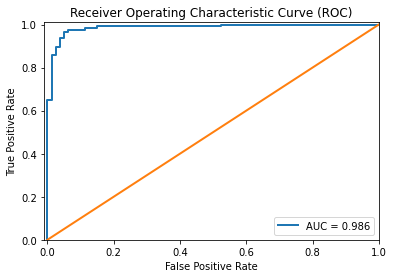

In [ ]:
#plotting the Receiver Operating Characteristic (ROC) Curve
false_pos_rate, true_pos_rate, thresholds = roc_curve(y_testLempre2, Scorelempre2_Ychi)
roc_auc = auc(false_pos_rate, true_pos_rate,)

plt.plot(false_pos_rate, true_pos_rate, linewidth=2, label='AUC = %0.3f'% roc_auc)
plt.plot([0,1],[0,1], linewidth=2)

plt.xlim([-0.01, 1])
plt.ylim([0, 1.01])
plt.legend(loc='lower right')
plt.title('Receiver Operating Characteristic Curve (ROC)')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

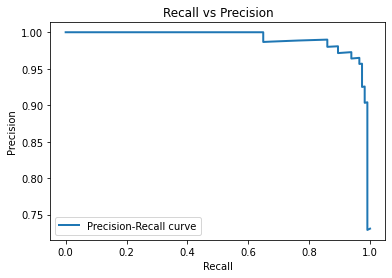

In [ ]:

#Plotting Precision versus Recall
precision_rate, recall_rate, threshold_rate = precision_recall_curve(y_testLempre2, Scorelempre2_Ychi)
plt.plot(recall_rate, precision_rate, linewidth=2, label='Precision-Recall curve')
plt.title('Recall vs Precision')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

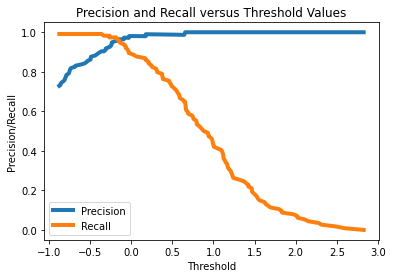

In [ ]:
#Plotting Precision and Recall for different Threshold values
plt.plot(threshold_rate, precision_rate[1:], label="Precision",linewidth=4)
plt.plot(threshold_rate, recall_rate[1:], label="Recall",linewidth=4)
plt.title('Precision and Recall versus Threshold Values')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')
plt.legend()
plt.show()

In [ ]:
#generating and printing a classification report
print(classification_report(y_testLempre2, Predlempre2_Ychi))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92        80
           1       0.98      0.89      0.94       114

    accuracy                           0.93       194
   macro avg       0.92      0.93      0.93       194
weighted avg       0.93      0.93      0.93       194



In [ ]:

print("Accuracy score with chi square data Lemmatisasi Pre2: ", accuracy_score(y_testLempre2,Predlempre2_Ychi))

Accuracy score with chi square data Lemmatisasi Pre2:  0.9278350515463918
